In [1]:
# importacion de las librerias
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


## Carga de datos

In [2]:
#read data.csv
df = pd.read_csv('data_1.csv', 
                dtype={'ESCALA':'category',
                        'CONSIGNATARI_23':'category'},
                parse_dates=['DATA_ENTRADA_PREVISTA_23','DATA_HORA_ENTRADA_23','DATA_SORTIDA_PREVISTA_23','DATA_HORA_SORTIDA_23'])

In [3]:
#show data
df.head()

,ESCALA,CONSIGNATARI_23,DATA_ENTRADA_PREVISTA_23,DATA_SORTIDA_PREVISTA_23,DATA_HORA_ENTRADA_23,DATA_HORA_SORTIDA_23
0,31497,MARITIMA DEL MEDITERRANEO SA,2022-01-14 14:24:00,2022-01-16 20:00:00,2022-01-14 14:24:00,2022-01-17 03:42:00
1,31500,MARITIMA DEL MEDITERRANEO SA,2022-01-15 23:00:00,2022-01-16 14:00:00,2022-01-16 02:41:00,2022-01-16 18:26:00
2,31510,MEDITERRANEAN SHIPPING COM ESPANA S,2022-01-24 16:00:00,2022-01-25 16:00:00,2022-01-24 15:47:00,2022-01-25 03:19:00
3,31533,MEDITERRANEAN SHIPPING COM ESPANA S,2022-01-23 12:00:00,2022-01-24 03:00:00,2022-01-23 18:35:00,2022-01-24 07:43:00
4,31534,MEDITERRANEAN SHIPPING COM ESPANA S,2022-01-29 06:00:00,2022-01-29 23:42:00,2022-01-29 23:40:00,2022-01-30 17:38:00


In [4]:
#show data types
df.dtypes

ESCALA                            category
CONSIGNATARI_23                   category
DATA_ENTRADA_PREVISTA_23    datetime64[ns]
DATA_SORTIDA_PREVISTA_23    datetime64[ns]
DATA_HORA_ENTRADA_23        datetime64[ns]
DATA_HORA_SORTIDA_23        datetime64[ns]
dtype: object

### 

In [5]:
# calcula la diferencia entre la fecha prevista de entrada y la fecha de entrada en horas.
df['DIFERENCIA_ENTRADA'] = (df['DATA_HORA_ENTRADA_23'] - df['DATA_ENTRADA_PREVISTA_23']) / np.timedelta64(1, 'h')


In [6]:
# calcula la diferencia entre la fecha prevista de salida y la fecha de salida en horas.
df['DIFERENCIA_SALIDA'] = (df['DATA_HORA_SORTIDA_23'] - df['DATA_SORTIDA_PREVISTA_23']) / np.timedelta64(1, 'h')


In [7]:
# verifica si hay valores nulos
df.isnull().sum()

ESCALA                      0
CONSIGNATARI_23             0
DATA_ENTRADA_PREVISTA_23    0
DATA_SORTIDA_PREVISTA_23    0
DATA_HORA_ENTRADA_23        0
DATA_HORA_SORTIDA_23        0
DIFERENCIA_ENTRADA          0
DIFERENCIA_SALIDA           0
dtype: int64

____

___

## Analisis de datos

1. estadísticas descriptivas: 

In [8]:
# muestras las estadisticas de la columna DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA
df[['DIFERENCIA_ENTRADA','DIFERENCIA_SALIDA']].describe().round(2)



,DIFERENCIA_ENTRADA,DIFERENCIA_SALIDA
count,653.00,653.00
mean,5.64,5.79
std,11.81,12.52
min,-22.02,-36.30
25%,0.47,-0.17
50%,2.88,3.55
75%,6.70,9.67
max,141.07,126.22


$~$

A partir de las estadísticas que se presentan, se pueden inferir varias conclusiones sobre las diferencias de entrada y salida en horas de las escalas que se está analizando. Algunas de ellas podrían ser:

+ En promedio, la diferencia entre la fecha prevista de entrada y la fecha de entrada real es de 5.64 horas, y la diferencia entre la fecha prevista de salida y la fecha de salida real es de 5.79 horas.

+ La desviación estándar para las diferencias de entrada y salida es significativa, con 11.81 y 12.52 horas respectivamente, indicando que hay una gran variabilidad en las diferencias entre fechas previstas y reales.

+ El 25% de las diferencias de entrada son de 0.47 horas o menos, y el 25% de las diferencias de salida son de -0.17 horas o menos. Esto indica que la mayoría de las entradas y salidas ocurren dentro de un margen cercano a la fecha prevista, pero hay una gran cantidad de entradas y salidas que ocurren con una diferencia significativa respecto a la fecha prevista.

+ El 50% de las diferencias de entrada son de 2.88 horas o menos, y el 50% de las diferencias de salida son de 3.55 horas o menos.

+ El 75% de las diferencias de entrada son de 6.70 horas o menos, y el 75% de las diferencias de salida son de 9.67 horas o menos.
La diferencia máxima entre fecha prevista y real para la entrada es de 141.07 horas, y para la salida es 126.22 horas, lo que indica que hay casos extremos en los que la diferencia es muy grande.


$~$

_____

## DIFERENCIA ENTRADA

$~$


$~$

DIFERENCIA_ENTRADA es una variable numérica  que refleja en horas la diferencia entre las horas previstas y las reales de entrada de los barcos(ESCALAS), así se pueden hacer estadisticas, analisis y graficar esa variable para tener una idea de cuanto se retrasa en promedio un barco en su entrada.

$~$

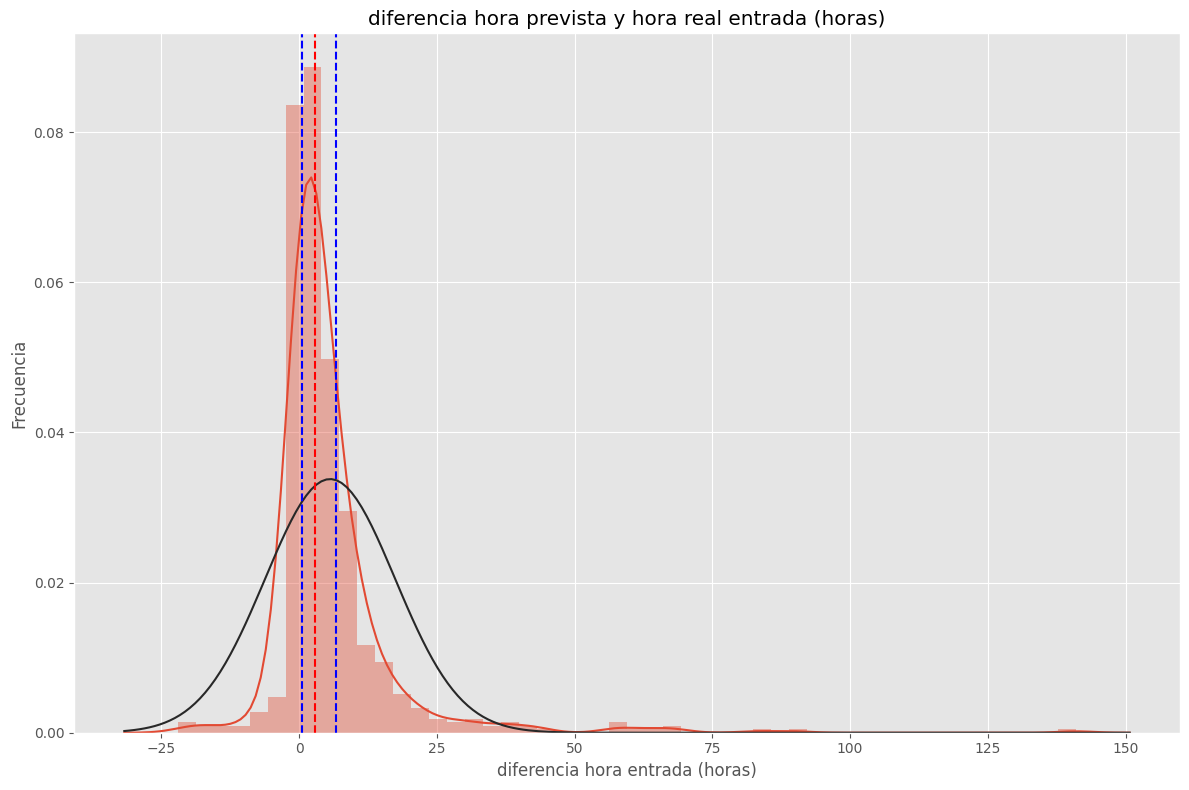

In [9]:
# crea un histograma (sns) de la columna DIFERENCIA_ENTRADA
# define el estilo como ggplot
plt.style.use('ggplot')


# definimos el tamaño de la figura
plt.figure(figsize=(12, 8))
# definimos el tipo de grafico
sns.distplot(df['DIFERENCIA_ENTRADA'], fit=norm)
# definimos el titulo
plt.title('diferencia hora prevista y hora real entrada (horas)')
# definimos la etiqueta del eje x
plt.xlabel('diferencia hora entrada (horas)')
# definimos la etiqueta del eje y
plt.ylabel('Frecuencia')
# añade una linea vertical en percentil 0.50 ,0.75 y 25 de la distribución
plt.axvline(df['DIFERENCIA_ENTRADA'].quantile(0.50), color='r', linestyle='--')
plt.axvline(df['DIFERENCIA_ENTRADA'].quantile(0.75), color='b', linestyle='--')
plt.axvline(df['DIFERENCIA_ENTRADA'].quantile(0.25), color='b', linestyle='--')
# mostramos el grafico
plt.tight_layout()
plt.show()


In [10]:
# Calcula la media aritmética
mean = np.mean(df.DIFERENCIA_ENTRADA)
print("La media es: {:.2f}".format(mean))
# Calcula la mediana
median = np.median(df.DIFERENCIA_ENTRADA)
print("La mediana es: {:.2f}".format(median))
# Calcula la moda
mode, count = stats.mode(df.DIFERENCIA_ENTRADA)
print("La moda es: {:.2f} y se repite {} veces".format(mode[0], count[0]))
# Comprueba si la distribución es simétrica o sesgada
if mean == median and mean == mode:
    print("La distribución es simétrica")
elif mean > median:
    print("La distribución es sesgada a la derecha")
else:
    print("La distribución es sesgada a la izquierda")

La media es: 5.64
La mediana es: 2.88
La moda es: 0.00 y se repite 19 veces
La distribución es sesgada a la derecha


$~$

Con este gráfico y los datos anteriores, se puede concluir que la diferencia entre la hora real de entrada y la hora prevista de entrada de los barcos tiende a ser positiva, es decir, que en general los barcos están llegando más tarde a puerto de lo previsto. Esto se observa en el gráfico donde la mayoría de los datos se encuentran a la derecha de cero, y en los datos estadísticos, donde la media es mayor a cero (5.64 horas) y la mediana también es mayor a cero (2.88 horas).

+ La media de esta variable es de 5.64 horas. Esto significa que, en promedio, los barcos llegan unas 5.64 horas más tarde de lo previsto.

+ La mediana es de 2.88 horas, lo que indica que la mitad de los barcos llegan entre 2.88 horas más tarde o antes de lo previsto.

+ La moda es de 0.00 horas y se repite 19 veces, lo que significa que hay un gran número de barcos que llegan a tiempo o en el mismo tiempo previsto.

+ La distribución es sesgada a la derecha, esto significa que hay una mayor cantidad de barcos que llegan más tarde de lo previsto.

En resumen, los barcos en general llegan con retraso a su hora de entrada prevista, pero hay un grupo importante de barcos que llegan a tiempo. **Es importante evaluar la causa de estos retrasos y ver cómo pueden ser minimizados.**

$~$

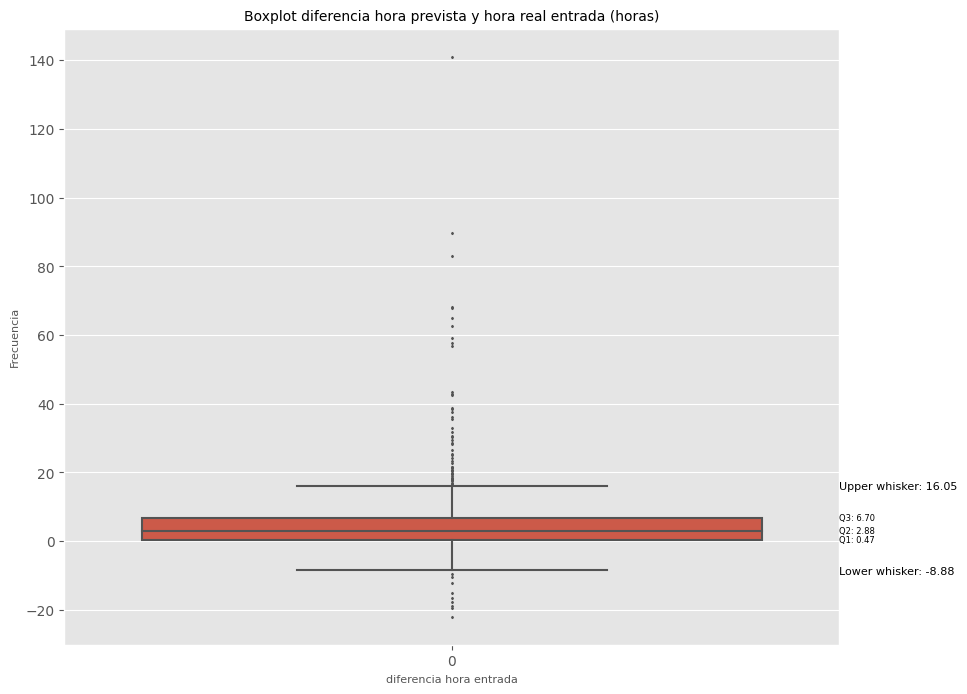

In [11]:
# crea un boxplot de la columna DIFERENCIA_ENTRADA
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico
sns.boxplot(df['DIFERENCIA_ENTRADA'],fliersize=1.2)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real entrada (horas)', fontsize=10)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora entrada',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Frecuencia',fontsize=8)
# Obtén los valores de los cuartiles usando el método quantile de pandas
q1 = df['DIFERENCIA_ENTRADA'].quantile(0.25)
q3 = df['DIFERENCIA_ENTRADA'].quantile(0.75)
q2 = df['DIFERENCIA_ENTRADA'].quantile(0.50)
# Calcula el rango intercuartílico
iqr = q3 - q1
# Calcula los límites inferior y superior
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Añade notas con los valores de los cuartiles en el gráfico
plt.gca().text(x=0.5, y=q1, s="Q1: {:.2f}".format(q1), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q2, s="Q2: {:.2f}".format(q2), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q3, s="Q3: {:.2f}".format(q3), va="center", ha="left",fontsize=6)
# Añade notas con los valores de los bigotes en el gráfico
plt.gca().text(x=0.5, y=lower_limit, s="Lower whisker: {:.2f}".format(lower_limit), va="center", ha="left", fontsize=8)
plt.gca().text(x=0.5, y=upper_limit, s="Upper whisker: {:.2f}".format(upper_limit), va="center", ha="left", fontsize=8)

plt.show()

$~$

En el gráfico anterior los puntos fuera de los bigotes (whiskers) son valores que están por fuera del rango (q1 - 1.5 * iqr, q3 + 1.5 * iqr) por lo que puede ser considerados como outliers.

En este caso, se puede ver que hay un gran número de valores con diferencia mayor a 0 (o sea, retrasos) y también se pueden ver varios outlier que están muy lejos del rango intercuartilico y que podrían representar casos extremos.

Además, se puede ver que los datos tienen una media de 5.64 horas y una mediana de 2.88 horas, lo cual indica que hay algunos casos extremos de retraso que afectan el valor de la media.

$~$

In [12]:
# agrupa los datos de DIFERENCIA_ENTRADA por consignatarios. ordena por count

df.groupby('CONSIGNATARI_23')['DIFERENCIA_ENTRADA'].describe(
).sort_values(by='count', ascending=False).round(2)


,count,mean,std,min,25%,50%,75%,max
CONSIGNATARI_23,,,,,,,,
MEDITERRANEAN SHIPPING COM ESPANA S,289.0,5.79,13.17,-22.02,0.42,3.02,6.67,141.07
CMA CGM IBERICA SAU,157.0,5.33,10.11,-18.78,0.48,2.33,7.35,62.57
MARITIMA DEL MEDITERRANEO SA,107.0,4.84,9.42,-1.52,0.43,2.30,5.82,67.85
WEC LINES ESPANA SLU,49.0,7.14,7.07,-5.95,4.32,5.25,9.57,43.45
SOLUCIONES INTEGRALES MARITIMAS SLU,16.0,-1.08,2.63,-10.43,-1.00,-0.79,-0.22,1.62
HAPAG LLOYD SPAIN SL,8.0,9.92,20.45,-6.33,1.53,3.27,8.29,59.03
ORIENT OVERSEAS CONTAINER LINE SPAI,8.0,6.54,8.69,0.00,1.54,3.61,6.88,26.40
A PEREZ Y CIA SL,6.0,24.73,34.07,2.22,5.00,8.55,28.80,89.70
AGENCIA MARITIMA ESPANOLA EVGE SA,6.0,7.17,7.69,-0.60,1.74,4.59,12.88,17.98


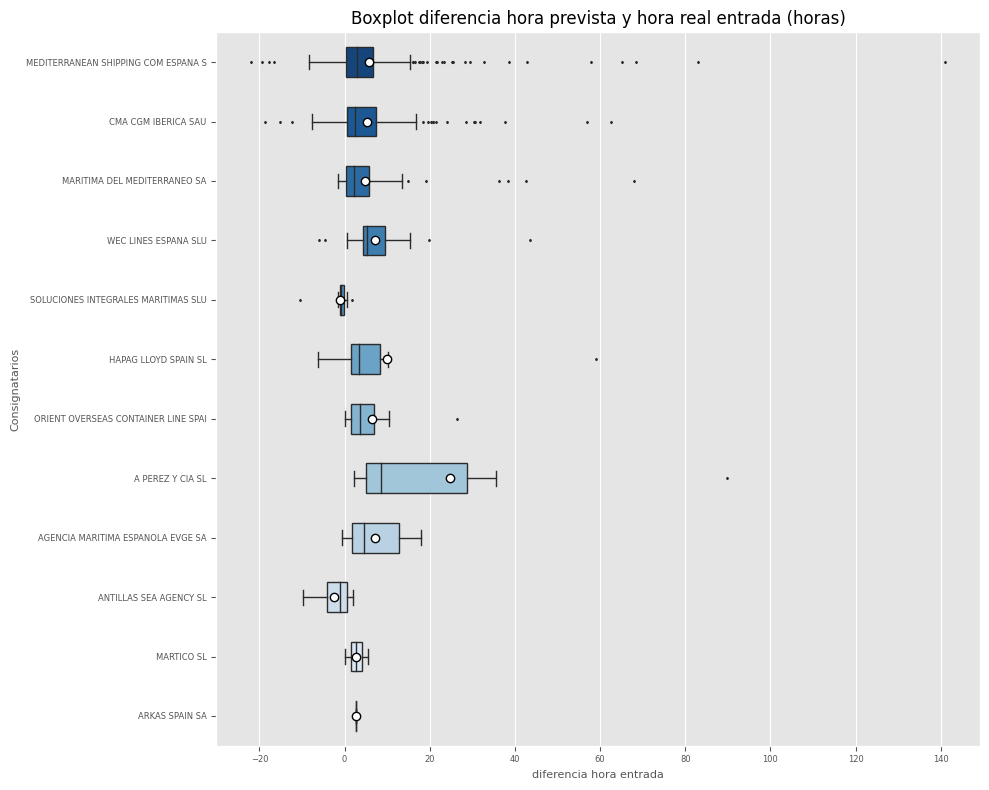

In [13]:
# crea un boxplot de la columna DIFERENCIA_ENTRADA agrupado por consignatarios
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico (ordenamos por count, y= "CONSIGNATARI_23", x= "DIFERENCIA_ENTRADA")
sns.boxplot(y="CONSIGNATARI_23", x="DIFERENCIA_ENTRADA", data=df, order=df.groupby('CONSIGNATARI_23')['DIFERENCIA_ENTRADA'].count().sort_values(ascending=False).index,
            fliersize=1.2, palette='Blues_r', linewidth=1, width=0.5, saturation=0.8, 
            showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},showfliers=True)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real entrada (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora entrada',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Consignatarios',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)
# mostramos el grafico
plt.tight_layout()
plt.show()



del gráfico de boxplot agrupado por consignatarios, se pueden observar varias cosas:

+ Los consignatarios tienen una gran variabilidad en la diferencia entre la hora prevista y la real de entrada, esto se puede ver en la amplitud de los bigotes en los gráficos.
    
+    Mediante los estadísticos obtenidos como count, mean, std, min, 25%, 50%, 75% y max, se puede observar que la diferencia de hora de entrada es mayor en consignatarios como Mediterranean Shipping Com España S con una diferencia promedio de 5.79 horas, mientras que en consignatarios como Martico SL es menor con una diferencia promedio de 2.75 horas.

+ También se pueden observar outliers (valores atípicos) en algunos consignatarios, esto se puede observar en los puntos más alejados de los bigotes en los gráficos. Por ejemplo en Mediterranean Shipping Com España S y A Perez y Cia SL.
    
+ Por otro lado el ordenamiento se realizo en base al count, es decir se ordeno por la frecuencia de los consignatarios (a más oscuro el azul, más elementos)


*El punto blanco en el gráfico es un indicador de la media de los datos agrupados por cada consignatario*

______

## DIFERENCIA SALIDA

$~$

DIFERENCIA SALIDA es una variable que indica la diferencia en horas entre la hora prevista y la hora real de salida del barco.

$~$

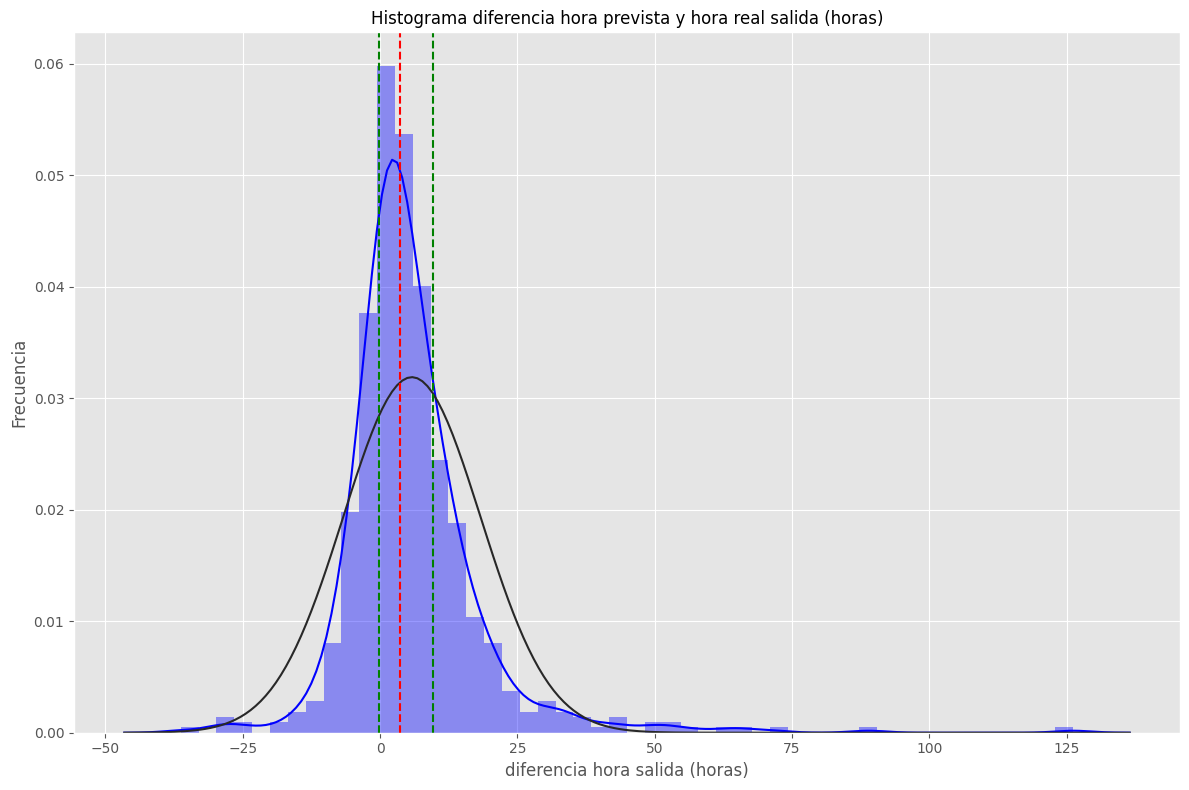

In [14]:
# crea un histograma (sns) de la columna DIFERENCIA_SALIDA
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(12, 8))
# definimos el tipo de grafico
sns.distplot(df['DIFERENCIA_SALIDA'], fit=norm,  color='blue', hist_kws={"alpha": 0.4}, kde=True)
# definimos el titulo
plt.gca().set_title('Histograma diferencia hora prevista y hora real salida (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.xlabel('diferencia hora salida (horas)')
# definimos la etiqueta del eje y
plt.ylabel('Frecuencia')
# añade una linea vertical en percentil, 0.25, 0.5, 0.75 de la distribucion
plt.axvline(df['DIFERENCIA_SALIDA'].quantile(0.25), color='g', linestyle='--')
plt.axvline(df['DIFERENCIA_SALIDA'].quantile(0.5), color='r', linestyle='--')
plt.axvline(df['DIFERENCIA_SALIDA'].quantile(0.75), color='g', linestyle='--')
# mostramos el grafico
plt.tight_layout()
plt.show()

In [15]:
# Calcula la media aritmética
mean = np.mean(df.DIFERENCIA_SALIDA)
print("La media es: {:.2f}".format(mean))
# Calcula la mediana
median = np.median(df.DIFERENCIA_SALIDA)
print("La mediana es: {:.2f}".format(median))
# Calcula la moda
mode, count = stats.mode(df.DIFERENCIA_SALIDA)
print("La moda es: {:.2f} y se repite {} veces".format(mode[0], count[0]))
# Comprueba si la distribución es simétrica o sesgada
if mean == median and mean == mode:
    print("La distribución es simétrica")
elif mean > median:
    print("La distribución es sesgada a la derecha")
else:
    print("La distribución es sesgada a la izquierda")

La media es: 5.79
La mediana es: 3.55
La moda es: 2.73 y se repite 4 veces
La distribución es sesgada a la derecha


Con este gráfico y estos datos, se pueden observar varios aspectos interesantes sobre la diferencia entre la hora prevista y la hora real de salida de los barcos.

+    La media de DIFERENCIA_SALIDA es de 5.79 horas, lo que indica que en promedio, la hora real de salida de los barcos es 5.79 horas más tarde que la hora prevista de salida.

+    La mediana de DIFERENCIA_SALIDA es de 3.55 horas, lo que significa que la mitad de las salidas de los barcos ocurrieron 3.55 horas más tarde de lo previsto.

+    La moda de DIFERENCIA_SALIDA es de 2.73 horas, con una repetición de 4 veces. Esto significa que la mayoría de las salidas de los barcos ocurrieron 2.73 horas más tarde de lo previsto.

+    La distribución de DIFERENCIA_SALIDA es sesgada a la derecha, lo que significa que hay una mayor cantidad de valores en la cola derecha de la distribución, lo que indica que hay más salidas tardías de lo previsto que puntuales.


En conjunto estas conclusiones sugieren que las salidas de los barcos suelen ser más tardías que lo previsto, con un promedio de retraso de 5.79 horas y una mayoría de salidas tardías de 2.73 horas. Esto podria ser importante para investigar las causas de los retrasos y tomar medidas para reducirlos.


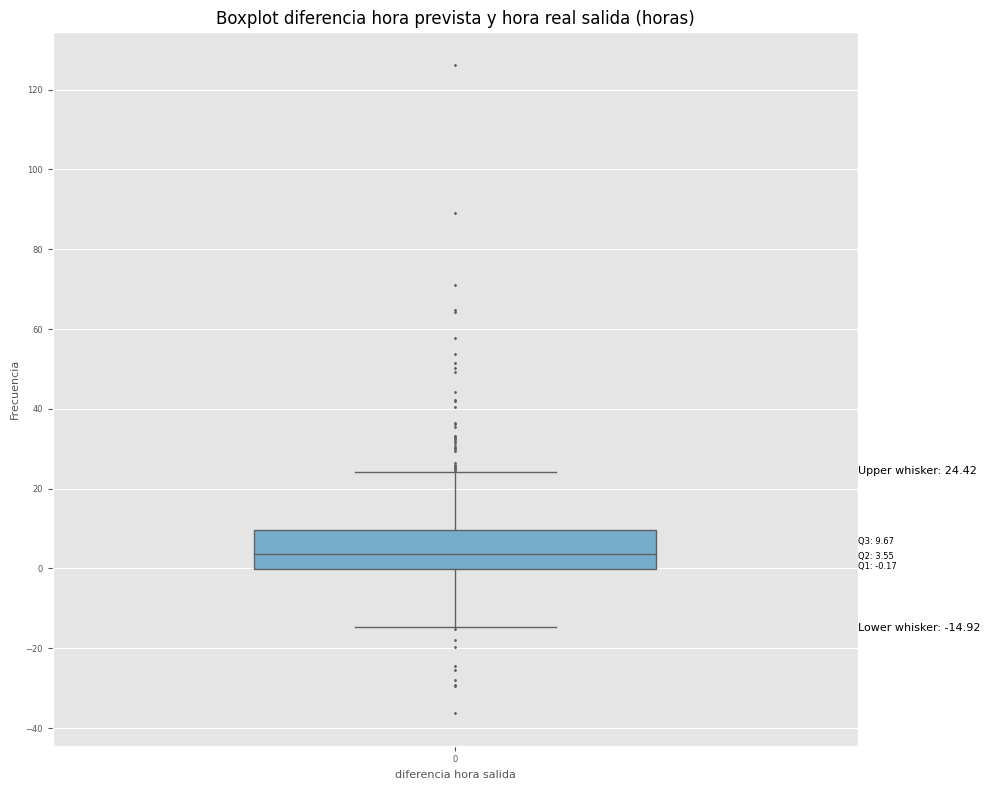

In [16]:
# crea un boxplot de la columna DIFERENCIA_SALIDA
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico
sns.boxplot(df['DIFERENCIA_SALIDA'], color='blue', fliersize=1.2, palette='Blues_r', linewidth=1, width=0.5, saturation=0.8)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real salida (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora salida',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Frecuencia',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)
# obtenemos los valores de los cuartiles usando el método quantile de pandas
q1_s = df['DIFERENCIA_SALIDA'].quantile(0.25)
q3_s = df['DIFERENCIA_SALIDA'].quantile(0.75)
q2_s = df['DIFERENCIA_SALIDA'].quantile(0.5)
# calculamos el rango intercuartil
iqr_s = q3_s - q1_s
# calculamos los limites inferior y superior
lower_limit_s = q1_s - 1.5 * iqr_s
upper_limit_s = q3_s + 1.5 * iqr_s

# añade notas con los valores de los cuartiles en el gráfico
# Añade notas con los valores de los cuartiles en el gráfico
plt.gca().text(x=0.5, y=q1, s="Q1: {:.2f}".format(q1_s), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q2, s="Q2: {:.2f}".format(q2_s), va="center", ha="left",fontsize=6)
plt.gca().text(x=0.5, y=q3, s="Q3: {:.2f}".format(q3_s), va="center", ha="left",fontsize=6)
# Añade notas con los valores de los bigotes en el gráfico
plt.gca().text(x=0.5, y=lower_limit_s, s="Lower whisker: {:.2f}".format(lower_limit_s), va="center", ha="left", fontsize=8)
plt.gca().text(x=0.5, y=upper_limit_s, s="Upper whisker: {:.2f}".format(upper_limit_s), va="center", ha="left", fontsize=8)

plt.tight_layout()

plt.show()



A partir de este gráfico y los datos proporcionados, se pueden concluir algunas cosas sobre la variable "DIFERENCIA_SALIDA":

+ Los valores más bajos de la variable se encuentran cerca de -0.17 horas y los valores más altos se encuentran cerca de 9.67 horas. El rango de la variable es de alrededor de 24.41 horas.

+ El cuartil 1 (Q1) es -0.16, el cuartil 2 (Q2) es el valor medio y el cuartil 3 (Q3) es 9.67. La diferencia entre el cuartil 3 y el cuartil 1 es 9.83 horas, lo que se conoce como el rango intercuartílico (IQR).

+ Los valores atípicos se encuentran entre el limite inferior de -14.92 y el limite superior de 24.41 horas.

Se puede concluir que la mayoria de las veces, los barcos no salen a la hora prevista, sino que se retrasan o anticipan en relación a la hora prevista.

$~$



In [17]:
# agrupa los datos de DIFERENCIA_SALIDA por consignatarios. Ordena por count

df.groupby('CONSIGNATARI_23')['DIFERENCIA_SALIDA'].describe(
            ).sort_values(by='count', ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
CONSIGNATARI_23,,,,,,,,
MEDITERRANEAN SHIPPING COM ESPANA S,289.0,6.63,14.82,-29.43,-0.62,3.83,10.48,126.22
CMA CGM IBERICA SAU,157.0,6.57,12.07,-29.13,0.40,4.37,10.90,64.33
MARITIMA DEL MEDITERRANEO SA,107.0,3.91,9.60,-36.30,-1.28,3.07,8.18,33.02
WEC LINES ESPANA SLU,49.0,3.15,4.24,-11.00,0.87,3.22,4.50,15.78
SOLUCIONES INTEGRALES MARITIMAS SLU,16.0,2.60,2.70,-4.37,1.76,2.89,4.59,5.97
HAPAG LLOYD SPAIN SL,8.0,2.40,12.32,-13.18,-6.77,1.39,9.63,19.67
ORIENT OVERSEAS CONTAINER LINE SPAI,8.0,12.70,13.73,-6.58,4.65,10.85,17.93,33.12
A PEREZ Y CIA SL,6.0,11.14,9.95,-1.72,4.00,11.33,17.90,24.23
AGENCIA MARITIMA ESPANOLA EVGE SA,6.0,3.73,9.55,-7.65,-2.17,1.95,8.67,18.77


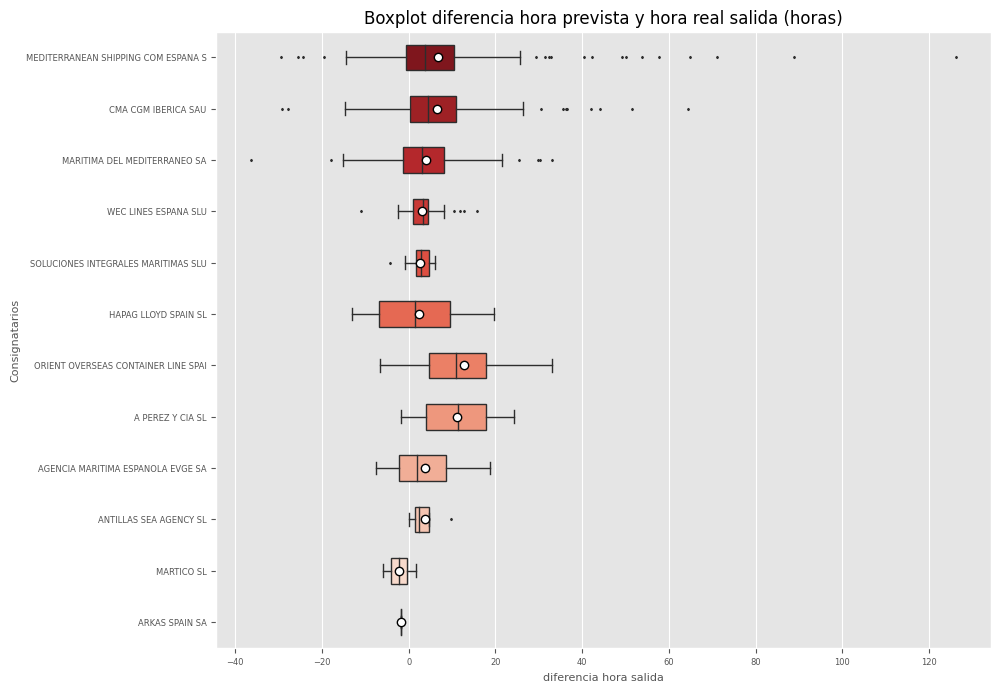

In [18]:
# crea un boxplot de la columna DIFERENCIA_SALIDA agrupado por consignatarios

#define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico (ordenamnos por countm, y= "CONSIGNATARI_23", x=DIFERENCIA_SALIDA)
sns.boxplot(y="CONSIGNATARI_23", x="DIFERENCIA_SALIDA", data=df, 
            order=df.groupby('CONSIGNATARI_23')['DIFERENCIA_SALIDA'].describe(
            ).sort_values(by='count', 
            ascending=False).round(2).index, color='blue', 
            fliersize=1.2, palette='Reds_r', linewidth=1, width=0.5, saturation=0.8,
            showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},showfliers=True)
# definimos el titulo
plt.gca().set_title('Boxplot diferencia hora prevista y hora real salida (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('diferencia hora salida',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Consignatarios',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)


$~$

Con este gráfico y estos datos se puede concluir que las diferencias de horas de salida previstas y reales varían significativamente entre los diferentes consignatarios.

Por ejemplo, en el caso de MEDITERRANEAN SHIPPING COM ESPANA S la media de la diferencia es 6.63 horas, mientras que en el caso de ORIENT OVERSEAS CONTAINER LINE SPAI es de 12.7 horas. En general, los consignatarios con mayor número de barcos registrados también tienen las diferencias más altas en términos de horas.

También se puede observar que hay valores atípicos (outliers) en varios consignatarios, como ORIENT OVERSEAS CONTAINER LINE SPAI y A PEREZ Y CIA SL, que tienen valores extremadamente altos de diferencia de horas de salida

$~$


___

## TIEMPO EN TERMINAL 

$~$

La variable **TIEMPO_TERMINAL** representa el tiempo que los barcos pasan en el terminal en horas, calculado como la diferencia entre la hora de salida (df['DATA_HORA_SORTIDA_23']) y la hora de entrada (df['DATA_HORA_ENTRADA_23']) en el terminal, expresado en unidades de horas 

$~$

In [19]:
# calcula la diferencia entre DATA_HORA_SORTIDA_23 y DATA_HORA_ENTRADA_23
df['TIEMPO_TERMINAL'] = (df['DATA_HORA_SORTIDA_23'] - df['DATA_HORA_ENTRADA_23']) / np.timedelta64(1, 'h')


In [20]:
df.TIEMPO_TERMINAL.describe().round(2)

count    653.00
mean      27.62
std       29.94
min        4.45
25%       12.62
50%       18.05
75%       31.42
max      409.83
Name: TIEMPO_TERMINAL, dtype: float64

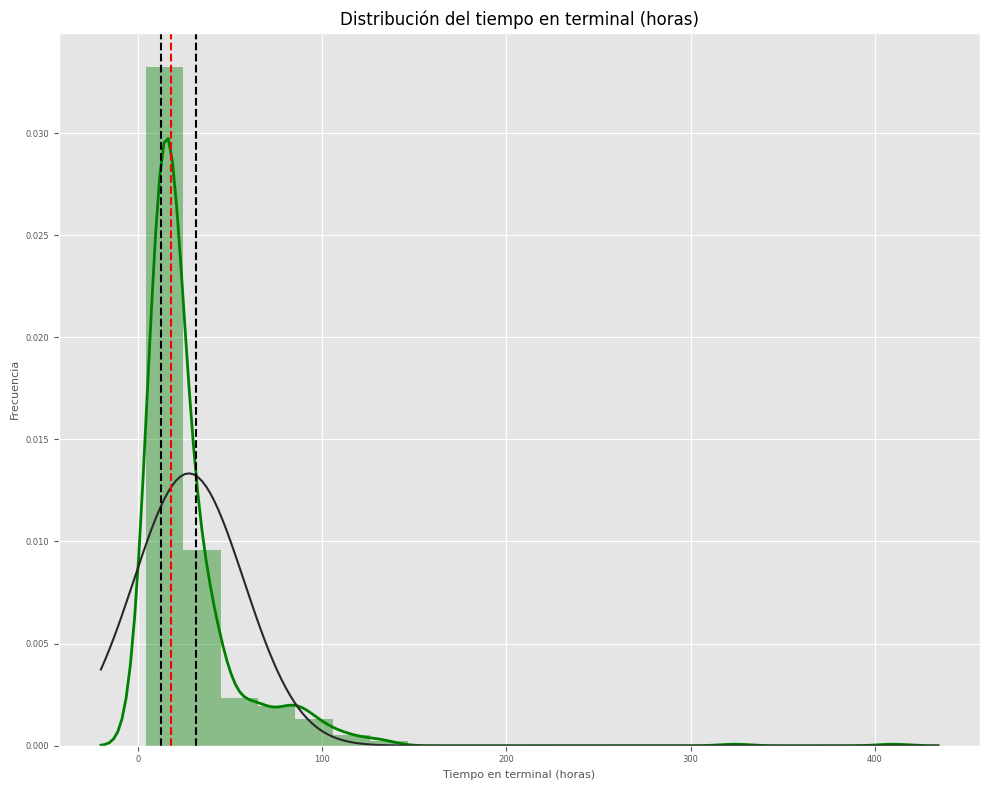

In [21]:
# crea un distplot de la columna TIEMPO_TERMINAL
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico
sns.distplot(df['TIEMPO_TERMINAL'], color='green', kde=True, bins=20, fit=norm, hist_kws={'alpha': 0.4}, kde_kws={'linewidth': 2})
# definimos el titulo
plt.gca().set_title('Distribución del tiempo en terminal (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('Tiempo en terminal (horas)',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Frecuencia',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)
# añade una linea vertical en los percentiles 
plt.axvline(df['TIEMPO_TERMINAL'].quantile(0.25), color='black', linestyle='--')
plt.axvline(df['TIEMPO_TERMINAL'].quantile(0.5), color='red', linestyle='--')
plt.axvline(df['TIEMPO_TERMINAL'].quantile(0.75), color='black', linestyle='--')

plt.tight_layout()
# muestra el gráfico
plt.show()


A partir de las estadísticas y el gráfico generado, se pueden extraer las siguientes conclusiones:

+ La variable mide el tiempo en horas que los barcos pasan en el terminal entre su entrada y salida.

+ El promedio de tiempo en terminal es de 27.62 horas.

+ La desviación estándar es 29.94, lo que indica que los datos están bastante dispersos.

+ El mínimo es de 4.45 horas y el máximo de 409.83 horas, lo que indica que hay un rango amplio de tiempos en terminal.

+ El 25% de los valores está por debajo de 12.62 horas, el 50% por debajo de 18.05 horas y el 75% por debajo de 31.42 horas.

+ El gráfico de distribución muestra una distribución sesgada a la derecha, con una gran cantidad de datos concentrados en valores menores a 30 horas y unos pocos valores extremadamente altos.

In [22]:
# agrupa los datos de TIEMPO_TERMINAL por consignatarios. Ordena por count

df.groupby('CONSIGNATARI_23')['TIEMPO_TERMINAL'].describe(
            ).sort_values(by='count', ascending=False).round(2)            

,count,mean,std,min,25%,50%,75%,max
CONSIGNATARI_23,,,,,,,,
MEDITERRANEAN SHIPPING COM ESPANA S,289.0,32.78,32.75,4.45,14.40,20.48,33.33,324.17
CMA CGM IBERICA SAU,157.0,25.85,34.95,5.28,12.13,17.38,35.60,409.83
MARITIMA DEL MEDITERRANEO SA,107.0,18.18,16.87,4.55,10.20,14.23,19.53,132.22
WEC LINES ESPANA SLU,49.0,15.70,4.74,9.03,12.10,15.30,17.92,33.10
SOLUCIONES INTEGRALES MARITIMAS SLU,16.0,50.24,25.07,8.05,21.66,63.60,64.55,84.57
HAPAG LLOYD SPAIN SL,8.0,31.11,12.76,11.40,24.15,29.72,38.14,49.18
ORIENT OVERSEAS CONTAINER LINE SPAI,8.0,42.55,11.45,27.02,36.11,39.76,47.07,62.23
A PEREZ Y CIA SL,6.0,20.95,9.40,11.05,16.75,17.81,22.89,38.07
AGENCIA MARITIMA ESPANOLA EVGE SA,6.0,11.96,3.77,7.95,10.03,11.00,12.72,18.80


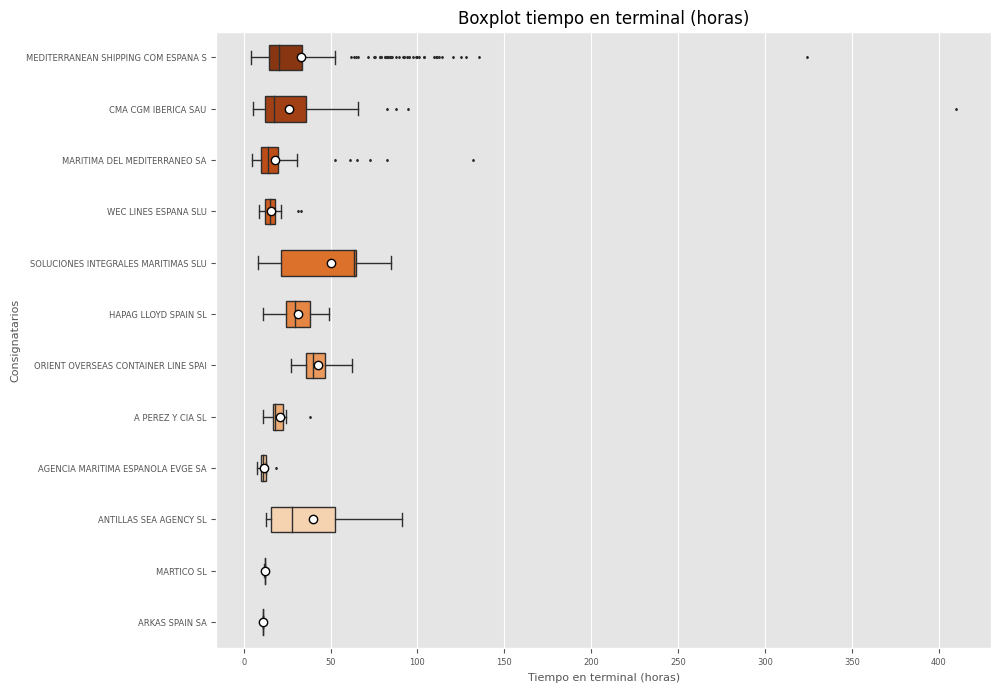

In [23]:
# crea un boxplot de la columna TIEMPO_TERMINAL agrupado por consignatarios

#define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
plt.figure(figsize=(10, 8))
# definimos el tipo de grafico (ordenamnos por countm, y= "CONSIGNATARI_23", x=TIEMPO_TERMINAL)
sns.boxplot(y="CONSIGNATARI_23", x="TIEMPO_TERMINAL", data=df,
            order=df.groupby('CONSIGNATARI_23')['TIEMPO_TERMINAL'].describe(
            ).sort_values(by='count',
            ascending=False).round(2).index, color='blue',
            fliersize=1.2, palette='Oranges_r', linewidth=1, width=0.5, saturation=0.8,
            showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"},showfliers=True)
# definimos el titulo
plt.gca().set_title('Boxplot tiempo en terminal (horas)', fontsize=12)
# definimos la etiqueta del eje x
plt.gca().set_xlabel('Tiempo en terminal (horas)',fontsize=8)
# definimos la etiqueta del eje y
plt.gca().set_ylabel('Consignatarios',fontsize=8)
# cambiamos el tamaño de la fuente de los ejes
plt.gca().tick_params(axis='both', which='major', labelsize=6)



El gráfico representa un boxplot agrupado por los consignatarios en el eje y y el tiempo que los barcos pasan en el terminal (en horas) en el eje x. Los consignatarios están ordenados por el número de observaciones (count) en el conjunto de datos. 

A partir de las estadísticas y boxplot anterior, se pueden concluir algunas cosas:

+ La media, la desviación típica, el mínimo y los percentiles permiten comprender globalmente la distribución de la columna "TIEMPO_TERMINAL".

+ En el boxplot podemos ver que hay una amplia gama de valores para la columna "TIEMPO_TERMINAL", con un mínimo de 4,45 horas y un máximo de 409,83 horas.

+ El boxplot de la distribución de la columna "TIEMPO_TERMINAL" para cada consignatario es bastante diferente, y que algunos consignatarioes tienen una gama de valores más amplia que otros.

+ Según las estadísticas, el consignatario con el mayor recuento de tiempo terminal es MEDITERRANEAN SHIPPING COM ESPANA S con la media más alta de 32,78 y con la desviación estándar más alta de 32,75.
    
+ En el boxplot también se puede observar que hay algunos valores atípicos en los datos.
    
+ por el recuento de TIEMPO_TERMINAL (número de valores) y muestra que el consignatario MEDITERRANEAN SHIPPING COM ESPANA S tiene el mayor número de valores para TIEMPO_TERMINAL y el consignatario A. PEREZ Y CIA SL tiene el menor número de valores para TIEMPO_TERMINAL.
   

### Time series

In [35]:
# crea un nuevo dataframe con la fecha de entrada como index
df_time = df.set_index('DATA_HORA_ENTRADA_23')
#agrupa los datos por meses
df_grouped = df_time.groupby(pd.Grouper(freq='m')).sum()


In [36]:
df_grouped.describe().round(2)

,DIFERENCIA_ENTRADA,DIFERENCIA_SALIDA,TIEMPO_TERMINAL
count,12.00,12.00,12.00
mean,306.95,315.12,1502.88
std,236.15,247.49,449.21
min,110.63,52.10,488.43
25%,157.58,146.00,1288.94
50%,243.64,231.77,1522.58
75%,388.97,437.61,1759.68
max,963.45,845.72,2111.55


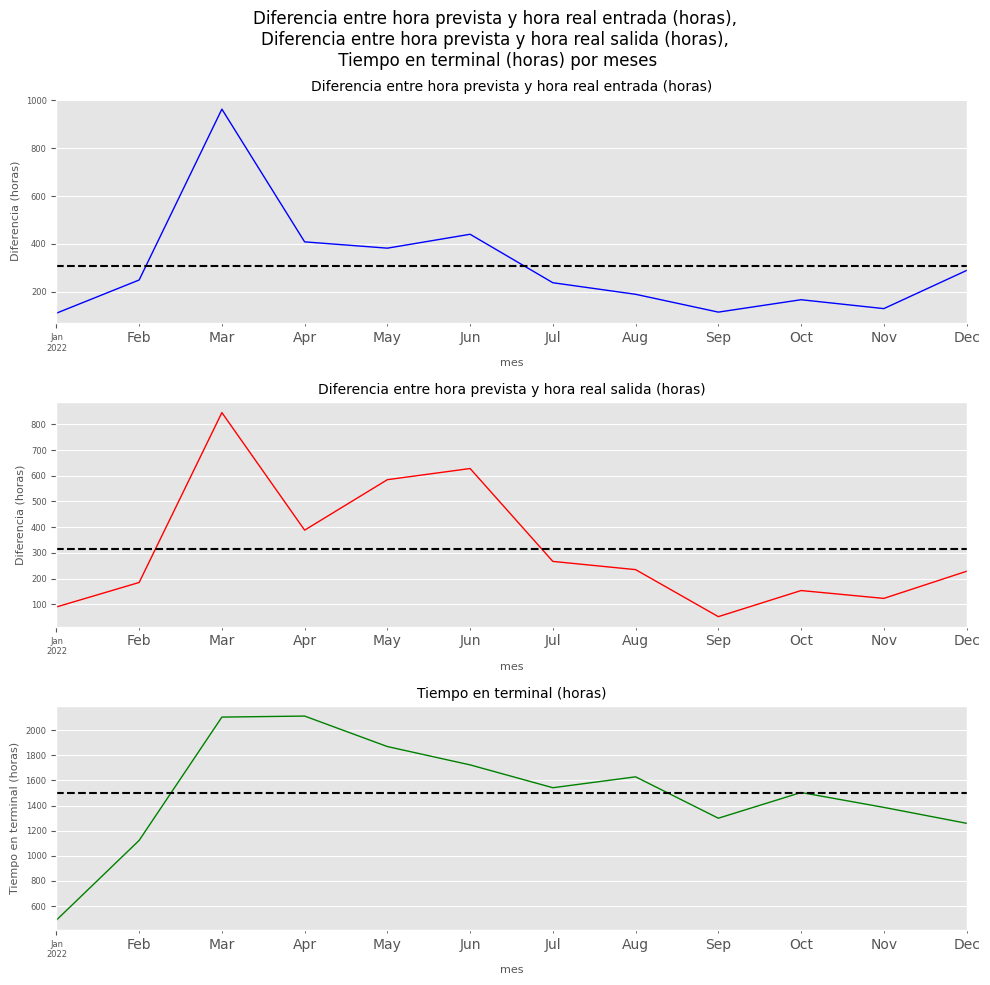

In [41]:
# crea un gráfico con las tres variables de interés (DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA, TIEMPO_TERMINAL)
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
fig, ax = plt.subplots(3, figsize=(10,10))
# definimos el tipo de grafico
df_grouped['DIFERENCIA_ENTRADA'].plot(ax=ax[0], color='blue', linewidth=1)
df_grouped['DIFERENCIA_SALIDA'].plot(ax=ax[1], color='red', linewidth=1)
df_grouped['TIEMPO_TERMINAL'].plot(ax=ax[2], color='green', linewidth=1)
# definimos el titulo
#set the title
fig.suptitle('Diferencia entre hora prevista y hora real entrada (horas),\nDiferencia entre hora prevista y hora real salida (horas),\n Tiempo en terminal (horas) por meses', fontsize=12)
# definimos el titulo
ax[0].set_title('Diferencia entre hora prevista y hora real entrada (horas)', fontsize=10)
ax[1].set_title('Diferencia entre hora prevista y hora real salida (horas)', fontsize=10)
ax[2].set_title('Tiempo en terminal (horas)', fontsize=10)
# definimos la etiqueta del eje x
ax[0].set_xlabel('mes',fontsize=8)
ax[1].set_xlabel('mes',fontsize=8)
ax[2].set_xlabel('mes',fontsize=8)
# definimos la etiqueta del eje y
ax[0].set_ylabel('Diferencia (horas)',fontsize=8)
ax[1].set_ylabel('Diferencia (horas)',fontsize=8)
ax[2].set_ylabel('Tiempo en terminal (horas)',fontsize=8)

# cambiamos el tamaño de la fuente de los ejes
ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

# añade linea horizontal con la media
ax[0].axhline(df_grouped['DIFERENCIA_ENTRADA'].mean(), color='black', linestyle='--')
ax[1].axhline(df_grouped['DIFERENCIA_SALIDA'].mean(), color='black', linestyle='--')
ax[2].axhline(df_grouped['TIEMPO_TERMINAL'].mean(), color='black', linestyle='--')


# muestra el gráfico
plt.tight_layout()
plt.show()




In [42]:
#agrupa los datos por semanas
df_grouped = df_time.groupby(pd.Grouper(freq='w')).sum()

df_grouped.describe().round(2)


,DIFERENCIA_ENTRADA,DIFERENCIA_SALIDA,TIEMPO_TERMINAL
count,52.00,52.00,52.00
mean,70.83,72.72,346.82
std,76.11,73.84,139.49
min,-6.83,-11.73,5.10
25%,27.38,22.62,288.71
50%,46.92,50.92,345.86
75%,92.25,111.62,414.42
max,414.65,323.82,822.22


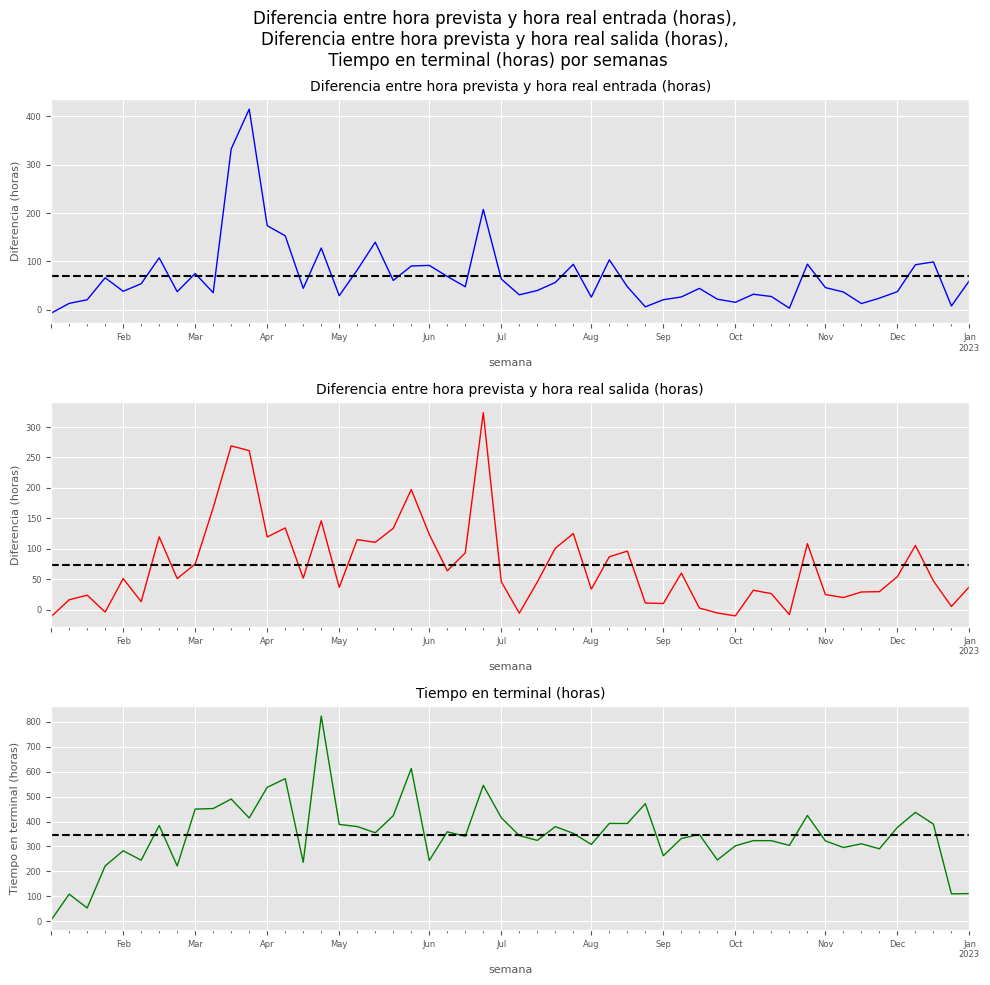

In [47]:
# crea un gráfico con las tres variables de interés (DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA, TIEMPO_TERMINAL)
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
fig, ax = plt.subplots(3, figsize=(10,10))
# definimos el tipo de grafico
df_grouped['DIFERENCIA_ENTRADA'].plot(ax=ax[0], color='blue', linewidth=1)
df_grouped['DIFERENCIA_SALIDA'].plot(ax=ax[1], color='red', linewidth=1)
df_grouped['TIEMPO_TERMINAL'].plot(ax=ax[2], color='green', linewidth=1)
# definimos el titulo
#set the title
fig.suptitle('Diferencia entre hora prevista y hora real entrada (horas),\nDiferencia entre hora prevista y hora real salida (horas),\n Tiempo en terminal (horas) por semanas', fontsize=12)
# definimos el titulo
ax[0].set_title('Diferencia entre hora prevista y hora real entrada (horas)', fontsize=10)
ax[1].set_title('Diferencia entre hora prevista y hora real salida (horas)', fontsize=10)
ax[2].set_title('Tiempo en terminal (horas)', fontsize=10)
# definimos la etiqueta del eje x
ax[0].set_xlabel('semana',fontsize=8)
ax[1].set_xlabel('semana',fontsize=8)
ax[2].set_xlabel('semana',fontsize=8)
# definimos la etiqueta del eje y
ax[0].set_ylabel('Diferencia (horas)',fontsize=8)
ax[1].set_ylabel('Diferencia (horas)',fontsize=8)
ax[2].set_ylabel('Tiempo en terminal (horas)',fontsize=8)

# cambiamos el tamaño de la fuente de los ejes
ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

# añade linea horizontal con la media
ax[0].axhline(df_grouped['DIFERENCIA_ENTRADA'].mean(), color='black', linestyle='--')
ax[1].axhline(df_grouped['DIFERENCIA_SALIDA'].mean(), color='black', linestyle='--')
ax[2].axhline(df_grouped['TIEMPO_TERMINAL'].mean(), color='black', linestyle='--')

# add trend line
#ax[0].plot(df_grouped['DIFERENCIA_ENTRADA'].rolling(window=4).mean(), color='black', linestyle='--')



# muestra el gráfico
plt.tight_layout()
plt.show()




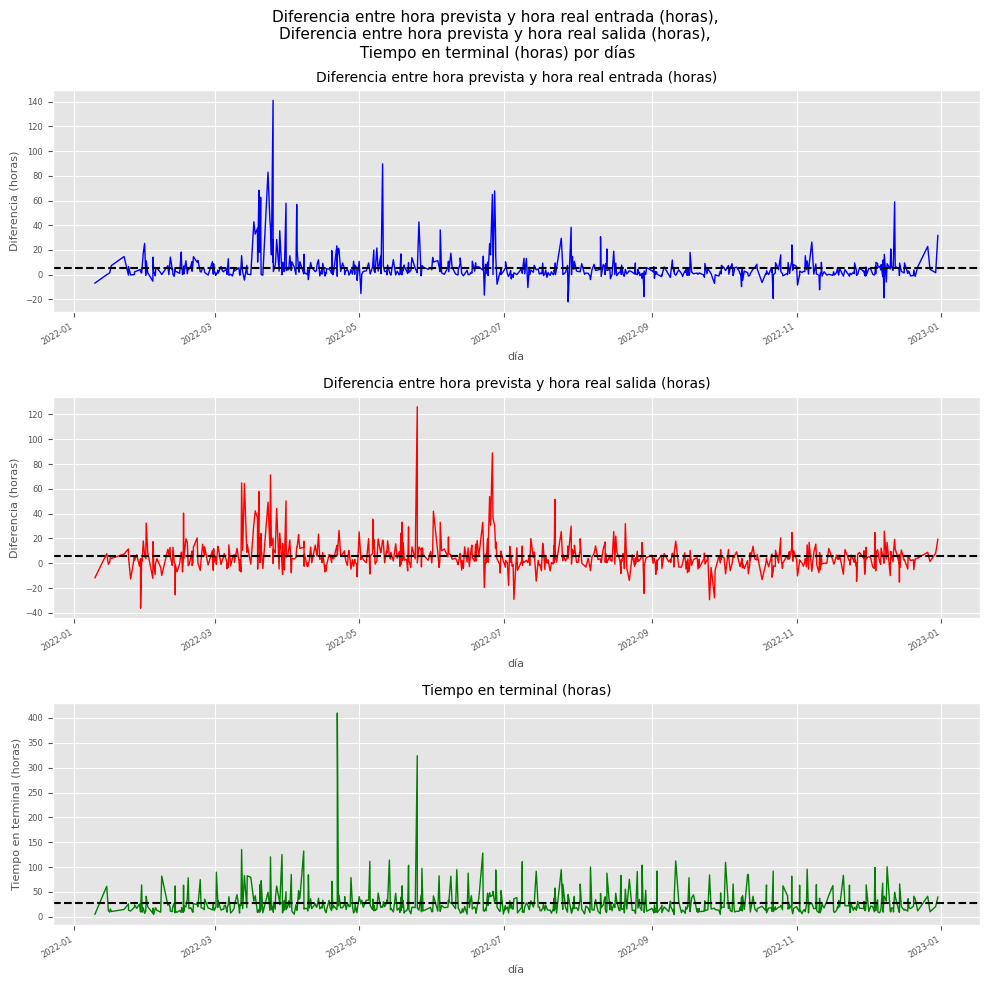

In [48]:
# crea un gráfico con las tres variables de interés (DIFERENCIA_ENTRADA, DIFERENCIA_SALIDA, TIEMPO_TERMINAL) por días

# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño de la figura
fig, ax = plt.subplots(3, figsize=(10,10))
# definimos el tipo de grafico
df_time['DIFERENCIA_ENTRADA'].plot(ax=ax[0], color='blue', linewidth=1)
df_time['DIFERENCIA_SALIDA'].plot(ax=ax[1], color='red', linewidth=1)
df_time['TIEMPO_TERMINAL'].plot(ax=ax[2], color='green', linewidth=1)
# definimos el titulo
#set the title
fig.suptitle('Diferencia entre hora prevista y hora real entrada (horas),\nDiferencia entre hora prevista y hora real salida (horas),\n Tiempo en terminal (horas) por días', fontsize=11)
# definimos el titulo
ax[0].set_title('Diferencia entre hora prevista y hora real entrada (horas)', fontsize=10)
ax[1].set_title('Diferencia entre hora prevista y hora real salida (horas)', fontsize=10)
ax[2].set_title('Tiempo en terminal (horas)', fontsize=10)
# definimos la etiqueta del eje x
ax[0].set_xlabel('día',fontsize=8)
ax[1].set_xlabel('día',fontsize=8)
ax[2].set_xlabel('día',fontsize=8)
# definimos la etiqueta del eje y
ax[0].set_ylabel('Diferencia (horas)',fontsize=8)
ax[1].set_ylabel('Diferencia (horas)',fontsize=8)
ax[2].set_ylabel('Tiempo en terminal (horas)',fontsize=8)

# cambiamos el tamaño de la fuente de los ejes
ax[0].tick_params(axis='both', which='major', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=6)
ax[2].tick_params(axis='both', which='major', labelsize=6)

# añade linea horizontal con la media
ax[0].axhline(df_time['DIFERENCIA_ENTRADA'].mean(), color='black', linestyle='--')
ax[1].axhline(df_time['DIFERENCIA_SALIDA'].mean(), color='black', linestyle='--')
ax[2].axhline(df_time['TIEMPO_TERMINAL'].mean(), color='black', linestyle='--')

# muestra el gráfico
plt.tight_layout()
plt.show()

In [66]:
# descomponer la serie de tiempo en sus componentes
from statsmodels.tsa.seasonal import seasonal_decompose
df
result = seasonal_decompose(df_time['DIFERENCIA_ENTRADA'], model='additive')
result.plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Importar datos de una serie de tiempo
# Supongamos que se tiene una serie de tiempo en un DataFrame llamado "df"
result = seasonal_decompose(df_time, model='multiplicative')

# Acceder a las componentes
result.trend
result.seasonal
result.resid


ValueError: could not convert string to float: 'MARITIMA DEL MEDITERRANEO SA'

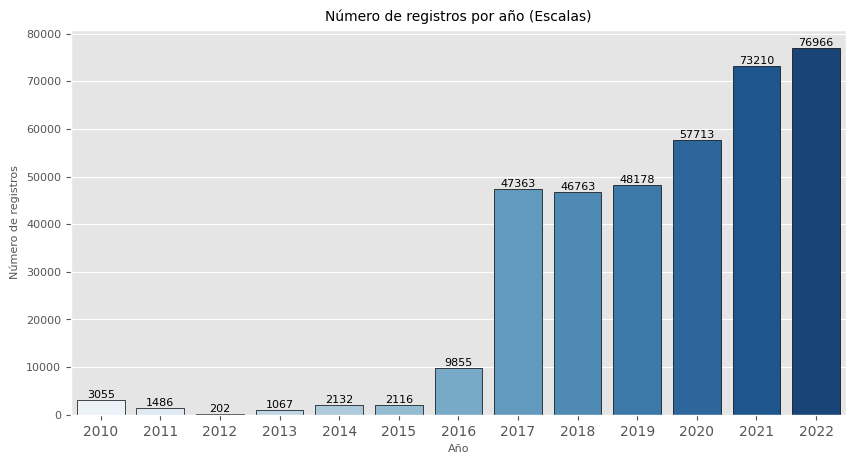

In [514]:
#define el estilo como ggplot
plt.style.use('ggplot')
#define el tamaño del gráfico
plt.figure(figsize=(10, 5))
#crea un gráfico de barras df_year
ax = sns.barplot(x='ARRIVAL_YEAR', y='COUNT', data=df_year, palette='Blues', ci=None,linewidth=0.5, edgecolor='k')
# añade título al gráfico
plt.gca().set_title("Número de registros por año (Escalas)", fontsize=10)

# Recorre las barras del gráfico y añade el valor correspondiente en cada una
ax.bar_label(ax.containers[0], fontsize=8)

#establece el tamaño de la fuente de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
# titula los ejes
plt.xlabel("Año", fontsize=8)
plt.ylabel("Número de registros", fontsize=8)
# muestra el gráfico
plt.show()



____

$~$

Diferencia de horas a traves de los años:

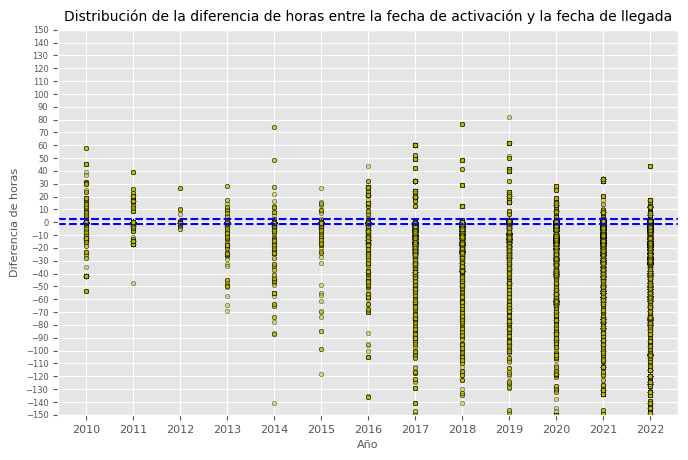

In [515]:
# crea un grafico de dispersion de diff_hours_clean vs. df[YEAR]
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(y=df['DIFF_HOURS'], x=df['ARRIVAL_YEAR'], alpha=0.5,
                s=10, marker='o', color='y', edgecolor='k', linewidth=0.5)
# añade título al gráfico
plt.gca().set_title("Distribución de la diferencia de horas entre la fecha de activación y la fecha de llegada", fontsize=10)
# añade etiquetas al eje x
plt.xlabel("Año", fontsize=8)
# ajusta el tamaño del eje y para que se vea mejor el gráfico
plt.ylim(-100, 100, 10)
# añade etiquetas al eje y
plt.ylabel("Diferencia de horas", fontsize=8)

# añade una linea horizontal upper_whisker y lower_whisker

plt.axhline(lower_whisker, color='b', linestyle='--')
plt.axhline(upper_whisker, color='b', linestyle='--')
# cambia el numero de ticks del eje y y la fuente de los ticks
plt.yticks(np.arange(-150, 160, 10), fontsize=6)
# cambia el numero de ticks del eje x y la fuente de los ticks

plt.xticks(np.arange(2010, 2023, 1), fontsize=8)
# Muestra la gráfica
plt.show()


existen muchos valores atipicos, véase a partir del 2017. Precisamente a partir de las fechas donde se han obtenido más datos.

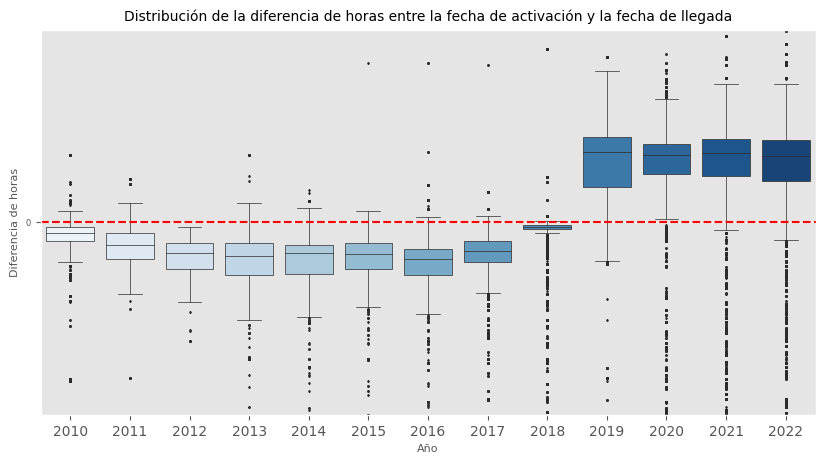

In [516]:
# crea un gráfico de caja y bigotes de diff_hours_clean vs. df[YEAR]
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
# crea el gráfico de caja y bigotes
sns.boxplot(y=df['DIFF_HOURS'], x=df['ARRIVAL_YEAR'], palette='Blues', linewidth=0.5, fliersize=1)
# añade título al gráfico
plt.gca().set_title("Distribución de la diferencia de horas entre la fecha de activación y la fecha de llegada", fontsize=10)
# añade etiquetas al eje x
plt.xlabel("Año", fontsize=8)
# añade etiquetas al eje y
plt.ylabel("Diferencia de horas", fontsize=8)
# cambia el numero de ticks del eje y y la fuente de los ticks
plt.yticks(np.arange(-150, 160, 10), fontsize=6)
# ajusta el tamaño del eje y para que se vea mejor el gráfico
plt.ylim(-2, 2, 0.5)
# añaade una línea horizontal en 0 para ver mejor la distribución
plt.axhline(y=0, color='r', linestyle='--')
# Muestra la gráfica
plt.show()




____

In [517]:
consignatarios = df.CONSIGNATARIO.value_counts().head(10).index.tolist()

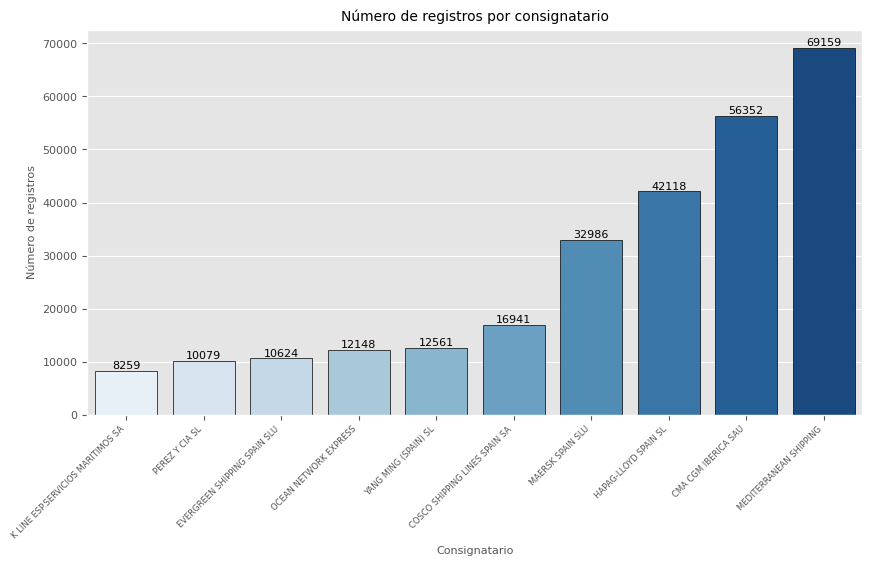

In [518]:
# crea un nuevo DataFrame con los registros de df que tengan como consignatario alguno de los 10 primeros de la lista
df_top10 = df[df['CONSIGNATARIO'].isin(consignatarios)]

# crea un gráfico de barras de la cantidad de registros por consignatario

# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
# crea el gráfico de barras, ordenado por la cantidad de registros de menor a mayor

ax = sns.countplot(x='CONSIGNATARIO', data=df_top10, palette='Blues',
                   order=df_top10['CONSIGNATARIO'].value_counts().sort_values().index, linewidth=0.5, edgecolor='k')
plt.gca().set_title("Número de registros por consignatario", fontsize=10)
# Recorre las barras del gráfico y añade el valor correspondiente en cada una
ax.bar_label(ax.containers[0], fontsize=8)
# cambia el numero de ticks del eje x y la fuente de los ticks
plt.xticks(fontsize=6, rotation=45, ha='right')
# cambia el numero de ticks del eje y y la fuente de los ticks
plt.yticks(fontsize=8)
# titula los ejes
plt.xlabel("Consignatario", fontsize=8)
plt.ylabel("Número de registros", fontsize=8)
# muestra el gráfico
plt.show()


In [519]:
# muestra la cantidad de registros por consignatario
df_top10['CONSIGNATARIO'].value_counts().to_frame()


,CONSIGNATARIO
MEDITERRANEAN SHIPPING,69159
CMA CGM IBERICA SAU,56352
HAPAG-LLOYD SPAIN SL,42118
MAERSK SPAIN SLU,32986
COSCO SHIPPING LINES SPAIN SA,16941
YANG MING (SPAIN) SL,12561
OCEAN NETWORK EXPRESS,12148
EVERGREEN SHIPPING SPAIN SLU,10624
PEREZ Y CIA SL,10079
K LINE ESP.SERVICIOS MARITIMOS SA,8259


Valores minimos por año:

In [520]:
#crea un pivot table con la cantidad minima registros por consignatario y año
pivot = pd.pivot_table(df_top10, values='DIFF_HOURS', index=['CONSIGNATARIO'], columns=['ARRIVAL_YEAR'], aggfunc=[np.min], fill_value=0)
# cambia el nombre de las columna amin por min_diff_hours. 
pivot = pivot.rename(columns={'amin': 'Valor minimo de diferencia de horas'})

#ordenamos el pivot table por el valor minimo de diferencia de horas de menor a mayor
pivot_min = pivot.sort_values(by=('Valor minimo de diferencia de horas', 2022), ascending=False)
pivot_min.round(2)

Valor minimo de diferencia de horas         \
ARRIVAL_YEAR                                                     2010   2011   
CONSIGNATARIO                                                                  
OCEAN NETWORK EXPRESS                                          -41.58   0.00   
YANG MING (SPAIN) SL                                             0.00   0.00   
EVERGREEN SHIPPING SPAIN SLU                                   -11.28  -0.63   
K LINE ESP.SERVICIOS MARITIMOS SA                               -0.53 -16.68   
PEREZ Y CIA SL                                                 -41.58 -14.48   
COSCO SHIPPING LINES SPAIN SA                                   -0.53 -16.68   
MAERSK SPAIN SLU                                                -9.25  -4.80   
HAPAG-LLOYD SPAIN SL                                           -41.58 -14.48   
MEDITERRANEAN SHIPPING                                         -53.47 -13.05   
CMA CGM IBERICA SAU                                            -25.12 -47.00   

                                                                        \
ARRIVAL_YEAR                       2012   2013    2014    2015    2016   
CONSIGNATARIO                                                            
OCEAN NETWORK EXPRESS              0.00   0.00    0.00    0.00   -0.33   
YANG MING (SPAIN) SL               0.00   0.00    0.00   -6.45   -0.58   
EVERGREEN SHIPPING SPAIN SLU      -0.50  -5.07   -2.52   -0.67  -21.87   
K LINE ESP.SERVICIOS MARITIMOS SA -3.10  -2.58   -2.37   -6.45  -21.87   
PEREZ Y CIA SL                     6.17 -64.52  -77.42   -5.00  -69.72   
COSCO SHIPPING LINES SPAIN SA     -5.13  -2.58 -186.12  -11.67  -46.27   
MAERSK SPAIN SLU                  -3.02 -17.75  -64.93  -23.95  -58.53   
HAPAG-LLOYD SPAIN SL              -3.05 -45.33  -13.98   -7.92  -69.72   
MEDITERRANEAN SHIPPING            -2.85 -34.07  -74.02  -12.83 -105.25   
CMA CGM IBERICA SAU               -3.05 -11.70 -140.70 -645.80 -136.45   

                                                                              \
ARRIVAL_YEAR                          2017    2018    2019     2020     2021   
CONSIGNATARIO                                                                  
OCEAN NETWORK EXPRESS               -29.43 -107.22  -98.58   -90.52   -58.02   
YANG MING (SPAIN) SL                -37.23 -107.22  -78.57   -41.28   -14.95   
EVERGREEN SHIPPING SPAIN SLU        -17.75  -37.75  -49.13  -481.58  -217.05   
K LINE ESP.SERVICIOS MARITIMOS SA   -50.02  -31.87  -83.05  -177.78  -112.97   
PEREZ Y CIA SL                      -89.97  -72.92  -88.07 -2465.32  -168.70   
COSCO SHIPPING LINES SPAIN SA       -62.10  -94.53  -83.05  -548.03  -112.97   
MAERSK SPAIN SLU                    -51.82 -217.70  -91.20  -327.70  -133.62   
HAPAG-LLOYD SPAIN SL                -89.97 -107.22 -101.52  -205.23  -213.37   
MEDITERRANEAN SHIPPING             -152.50 -199.03 -174.35  -561.35 -4010.43   
CMA CGM IBERICA SAU               -2659.87 -544.02 -409.82  -157.65  -237.73   

                                            
ARRIVAL_YEAR                          2022  
CONSIGNATARIO                               
OCEAN NETWORK EXPRESS              -119.53  
YANG MING (SPAIN) SL               -119.53  
EVERGREEN SHIPPING SPAIN SLU       -165.63  
K LINE ESP.SERVICIOS MARITIMOS SA  -165.63  
PEREZ Y CIA SL                     -170.25  
COSCO SHIPPING LINES SPAIN SA      -210.77  
MAERSK SPAIN SLU                   -246.40  
HAPAG-LLOYD SPAIN SL               -457.40  
MEDITERRANEAN SHIPPING             -738.83  
CMA CGM IBERICA SAU               -5876.62

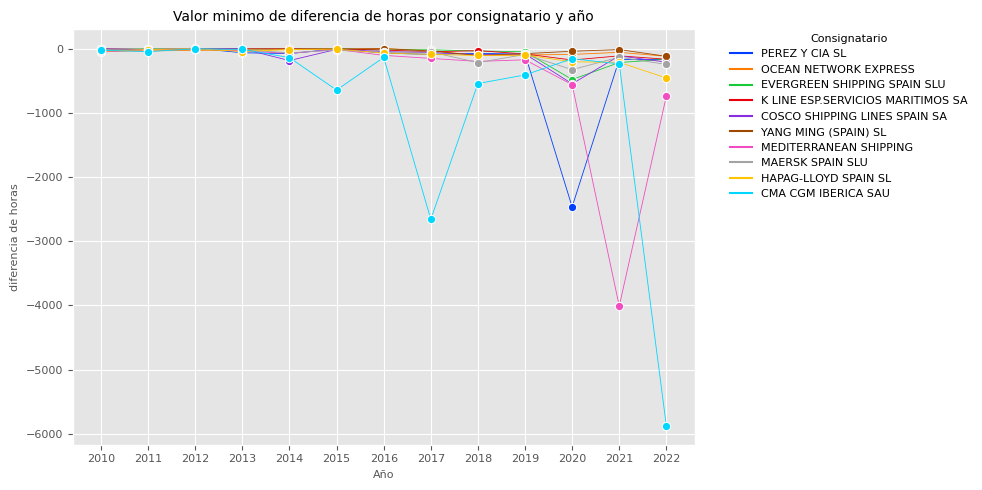

In [521]:
to_plot_min = df_top10[["CONSIGNATARIO", "ARRIVAL_YEAR", "DIFF_HOURS"]].groupby(["CONSIGNATARIO", "ARRIVAL_YEAR"]).agg(np.min).sort_values(by="DIFF_HOURS", ascending=False).round(2)
# estilo ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(x="ARRIVAL_YEAR", y="DIFF_HOURS", hue="CONSIGNATARIO", data=to_plot_min, linewidth=0.6, markers=True, dashes=True, ci=None, marker='o', palette='bright')   
plt.gca().set_title("Valor minimo de diferencia de horas por consignatario y año", fontsize=10)
plt.xlabel("Año", fontsize=8)
plt.ylabel("diferencia de horas", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(np.arange(2010, 2023, 1), fontsize=8)
# muestra la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, title="Consignatario", title_fontsize=8, frameon=False)
plt.tight_layout()
plt.show()

Valores maximo por año:

In [522]:
#crea un pivot table con la cantidad minima registros por consignatario y año
pivot = pd.pivot_table(df_top10, values='DIFF_HOURS', index=['CONSIGNATARIO'], columns=['ARRIVAL_YEAR'], aggfunc=[np.max], fill_value=0)
# cambia el nombre de las columna amin por max_diff_hours. 
pivot = pivot.rename(columns={'amax': 'Valor maximo de diferencia de horas'})

#ordenamos el pivot table por el valor maximo de diferencia de horas de menor a mayor
pivot_max = pivot.sort_values(by=('Valor maximo de diferencia de horas', 2022), ascending=False)
pivot_max.round(2)

Valor maximo de diferencia de horas         \
ARRIVAL_YEAR                                                     2010   2011   
CONSIGNATARIO                                                                  
HAPAG-LLOYD SPAIN SL                                            30.28  25.52   
PEREZ Y CIA SL                                                  38.90  22.98   
CMA CGM IBERICA SAU                                             30.28  20.50   
MEDITERRANEAN SHIPPING                                          37.10   0.40   
COSCO SHIPPING LINES SPAIN SA                                   45.68  16.47   
EVERGREEN SHIPPING SPAIN SLU                                     5.65  -0.43   
K LINE ESP.SERVICIOS MARITIMOS SA                                0.07  16.47   
MAERSK SPAIN SLU                                                45.68  39.43   
YANG MING (SPAIN) SL                                             0.00   0.00   
OCEAN NETWORK EXPRESS                                           -4.37   0.00   

                                                                              \
ARRIVAL_YEAR                        2012   2013   2014   2015    2016   2017   
CONSIGNATARIO                                                                  
HAPAG-LLOYD SPAIN SL               26.67   0.20  27.65  -0.05  189.47  59.87   
PEREZ Y CIA SL                      6.17  28.23   0.22  -0.02   23.95   1.63   
CMA CGM IBERICA SAU                -0.15  13.88  22.27   0.08  153.05  52.75   
MEDITERRANEAN SHIPPING             10.03   9.90  12.42  15.62  193.45  59.87   
COSCO SHIPPING LINES SPAIN SA      -0.37   7.42  73.87  14.08   27.62  49.53   
EVERGREEN SHIPPING SPAIN SLU       -0.50  -0.08  73.87  -0.12   27.62  -0.07   
K LINE ESP.SERVICIOS MARITIMOS SA  -3.10  -0.20  -0.25  13.15   -0.15  19.98   
MAERSK SPAIN SLU                   26.67  -0.07  48.30   0.05   26.32  32.07   
YANG MING (SPAIN) SL                0.00   0.00   0.00  -6.45   -0.28  19.98   
OCEAN NETWORK EXPRESS               0.00   0.00   0.00   0.00   -0.33  -0.08   

                                                                         
ARRIVAL_YEAR                        2018    2019     2020   2021   2022  
CONSIGNATARIO                                                            
HAPAG-LLOYD SPAIN SL                0.00   61.35    27.87  32.17  44.17  
PEREZ Y CIA SL                     -0.02   61.35    27.87  32.17  44.17  
CMA CGM IBERICA SAU                29.22   61.35    27.87  32.17  17.40  
MEDITERRANEAN SHIPPING             76.77   50.08    13.60  33.55  17.40  
COSCO SHIPPING LINES SPAIN SA      12.90   15.73    27.87  32.17  12.33  
EVERGREEN SHIPPING SPAIN SLU       -0.02    1.35     7.98   9.85  12.33  
K LINE ESP.SERVICIOS MARITIMOS SA  -0.02    1.02     8.37   7.92  12.33  
MAERSK SPAIN SLU                   48.78  643.68  2839.03  33.55   7.55  
YANG MING (SPAIN) SL               -0.02    8.88    15.85  32.17   7.55  
OCEAN NETWORK EXPRESS              -0.02    1.38    15.85  32.17   1.63

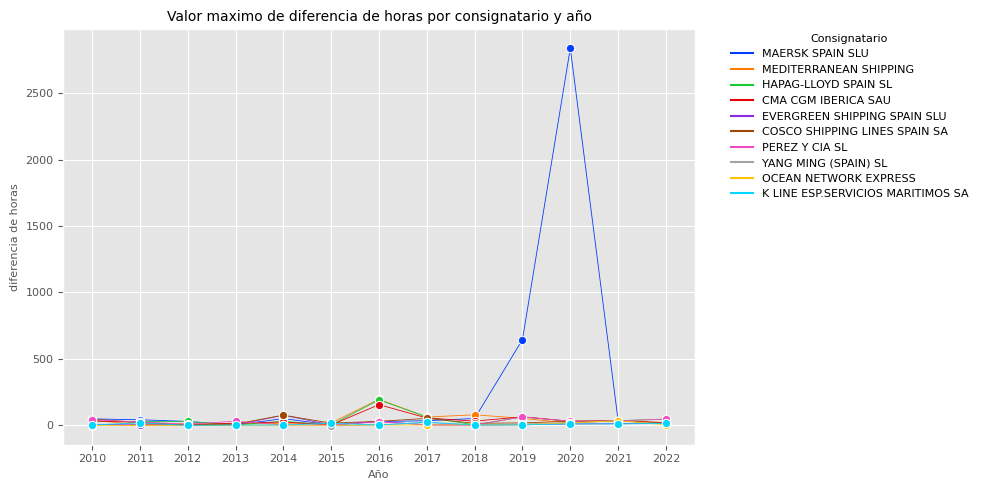

In [523]:
to_plot_max = df_top10[["CONSIGNATARIO", "ARRIVAL_YEAR", "DIFF_HOURS"]].groupby(["CONSIGNATARIO", "ARRIVAL_YEAR"]).agg(np.max).sort_values(by="DIFF_HOURS", ascending=False).round(2)
# estilo ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(x="ARRIVAL_YEAR", y="DIFF_HOURS", hue="CONSIGNATARIO", data=to_plot_max, linewidth=0.6, markers=True, dashes=True, ci=None, marker='o', palette='bright')   
plt.gca().set_title("Valor maximo de diferencia de horas por consignatario y año", fontsize=10)
plt.xlabel("Año", fontsize=8)
plt.ylabel("diferencia de horas", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(np.arange(2010, 2023, 1), fontsize=8)
# muestra la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, title="Consignatario", title_fontsize=8, frameon=False)
plt.tight_layout()
plt.show()

Valores promedio por año:

In [524]:
#crea un pivot table con la cantidad promedio registros por consignatario y año
pivot = pd.pivot_table(df_top10, values='DIFF_HOURS', index=['CONSIGNATARIO'], columns=['ARRIVAL_YEAR'], aggfunc=[np.mean], fill_value=0)
# cambia el nombre de las columna amin por max_diff_hours. 
pivot = pivot.rename(columns={'mean': 'Valor promedio de diferencia de horas'})

#ordenamos el pivot table por el valor promedio de diferencia de horas de menor a mayor
pivot_mean= pivot.sort_values(by=('Valor promedio de diferencia de horas', 2022), ascending=False)
pivot_mean.round(2)

Valor promedio de diferencia de horas        \
ARRIVAL_YEAR                                                       2010  2011   
CONSIGNATARIO                                                                   
PEREZ Y CIA SL                                                    -2.41  1.17   
MAERSK SPAIN SLU                                                   0.54  1.76   
YANG MING (SPAIN) SL                                               0.00  0.00   
OCEAN NETWORK EXPRESS                                            -22.98  0.00   
COSCO SHIPPING LINES SPAIN SA                                      2.90 -0.22   
HAPAG-LLOYD SPAIN SL                                              -3.58 -1.34   
MEDITERRANEAN SHIPPING                                            -0.09 -0.62   
EVERGREEN SHIPPING SPAIN SLU                                      -1.25 -0.50   
CMA CGM IBERICA SAU                                                0.10  0.19   
K LINE ESP.SERVICIOS MARITIMOS SA                                 -0.16  0.92   

                                                                              \
ARRIVAL_YEAR                       2012  2013   2014  2015  2016  2017  2018   
CONSIGNATARIO                                                                  
PEREZ Y CIA SL                     6.17 -3.19 -10.52 -1.20 -2.46 -5.12 -5.47   
MAERSK SPAIN SLU                   0.51 -0.98  -0.70 -0.83 -1.01 -1.15 -1.03   
YANG MING (SPAIN) SL               0.00  0.00   0.00 -6.45 -0.48 -0.52 -0.95   
OCEAN NETWORK EXPRESS              0.00  0.00   0.00  0.00 -0.33 -2.44 -0.88   
COSCO SHIPPING LINES SPAIN SA     -2.75 -0.02  -2.11 -0.39 -0.97 -1.69 -1.89   
HAPAG-LLOYD SPAIN SL               0.61 -1.97  -0.22 -0.58 -2.08 -1.90 -1.71   
MEDITERRANEAN SHIPPING            -0.29 -2.19  -3.00 -0.47 -1.39 -2.66 -1.63   
EVERGREEN SHIPPING SPAIN SLU      -0.50 -0.99   3.29 -0.34 -0.23 -0.67 -1.29   
CMA CGM IBERICA SAU               -0.67 -0.33  -1.84 -6.39 -3.11 -4.73 -4.33   
K LINE ESP.SERVICIOS MARITIMOS SA -3.10 -0.62  -0.43 -0.17 -1.26 -0.78 -1.17   

                                                               
ARRIVAL_YEAR                        2019   2020   2021   2022  
CONSIGNATARIO                                                  
PEREZ Y CIA SL                     -3.73  -6.48  -4.06  -2.59  
MAERSK SPAIN SLU                    0.11  -0.66  -3.00  -3.56  
YANG MING (SPAIN) SL                0.52   0.70   0.86  -4.47  
OCEAN NETWORK EXPRESS               0.40   0.50   0.85  -4.59  
COSCO SHIPPING LINES SPAIN SA       0.17  -0.31  -2.87  -5.01  
HAPAG-LLOYD SPAIN SL                0.02  -1.14  -1.75  -5.11  
MEDITERRANEAN SHIPPING             -0.62  -2.60 -10.14  -6.69  
EVERGREEN SHIPPING SPAIN SLU        0.62  -1.51  -1.63  -6.70  
CMA CGM IBERICA SAU                -1.93  -3.18  -4.24  -7.63  
K LINE ESP.SERVICIOS MARITIMOS SA -14.66 -16.70 -11.60 -15.01

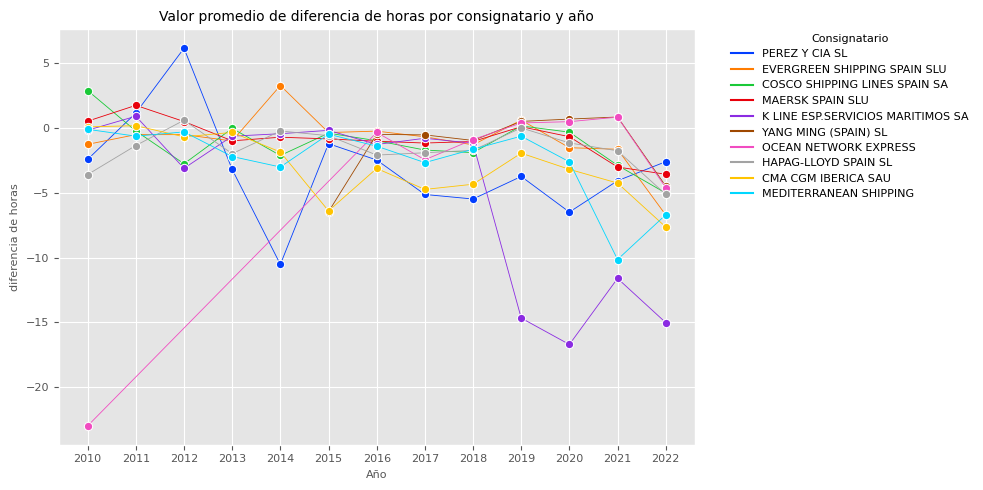

In [525]:
to_plot_mean = df_top10[["CONSIGNATARIO", "ARRIVAL_YEAR", "DIFF_HOURS"]].groupby(["CONSIGNATARIO", "ARRIVAL_YEAR"]).agg(np.mean).sort_values(by="DIFF_HOURS", ascending=False).round(2)
# estilo ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(x="ARRIVAL_YEAR", y="DIFF_HOURS", hue="CONSIGNATARIO", data=to_plot_mean, linewidth=0.6, markers=True, dashes=True, ci=None, marker='o', palette='bright')   
plt.gca().set_title("Valor promedio de diferencia de horas por consignatario y año", fontsize=10)
plt.xlabel("Año", fontsize=8)
plt.ylabel("diferencia de horas", fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(np.arange(2010, 2023, 1), fontsize=8)
# muestra la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, title="Consignatario", title_fontsize=8, frameon=False)
plt.tight_layout()
plt.show()

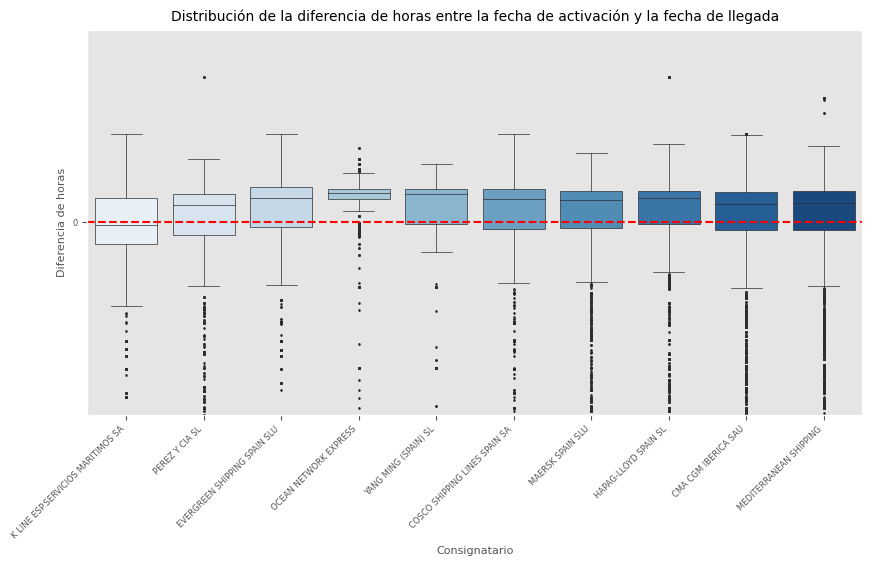

In [526]:
#crea un boxplot de diff_hours_clean vs. df[CONSIGNATARIO], ordenado por la cantidad de registros de menor a mayor
# define el estilo como ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
# crea el gráfico de caja y bigotes, ordenado por la cantidad de registros de menor a mayor
sns.boxplot(y=df_top10['DIFF_HOURS'], x=df_top10['CONSIGNATARIO'], palette='Blues', linewidth=0.5, order=df_top10['CONSIGNATARIO'].value_counts().sort_values().index, showfliers=True, fliersize=1)
# añade título al gráfico
plt.gca().set_title("Distribución de la diferencia de horas entre la fecha de activación y la fecha de llegada", fontsize=10)
# añade etiquetas al eje x
plt.xlabel("Consignatario", fontsize=8)

# añade etiquetas al eje y
plt.ylabel("Diferencia de horas", fontsize=8)
# cambia el numero de ticks del eje y y la fuente de los ticks
plt.yticks(np.arange(-150, 160, 10), fontsize=6)
# cambia el tamaño de los ticks del eje x y la fuente de los ticks
plt.xticks(fontsize=6, rotation=45, ha='right')
# ajusta el tamaño del eje y para que se vea mejor el gráfico
plt.ylim(-5, 5, 0.5)
# añaade una línea horizontal en 0 para ver mejor la distribución
plt.axhline(y=0, color='r', linestyle='--')
# Muestra la gráfica
plt.show()

____

In [578]:
#df where ORIGEN_MERCANCIA is not null
df_origen = df[df['ORIGEN_MERCADERIA'].notnull()]

top_origen = df_origen['ORIGEN_MERCADERIA'].value_counts().to_frame().rename(columns={'ORIGEN_MERCADERIA': 'count'})

top_origen.head(20)

,count
CNNGB,7735
CNSHA,7178
KRPUS,5438
INNSA,4942
CNYTN,4644
HKHKG,4436
CNTAO,4362
CNXMN,4146
VNSGN,4087
SGSIN,4070


In [579]:
#create a pivot table with the count of records by ORIGEN_MERCADERIA and ARRIVAL_YEAR
pivot_origen = pd.pivot_table(df_origen, values='DIFF_HOURS', index=['ORIGEN_MERCADERIA'], columns=['ARRIVAL_YEAR'], aggfunc=[len], fill_value=0, margins=True, margins_name='Total').sort_values(by=('len', 2022), ascending=False)
# change len column name to count
pivot_origen = pivot_origen.rename(columns={'len': 'count'})

#sort pivot table by Total column from greater to lower
pivot_count= pivot_origen.sort_values(by=('count', 'Total'), ascending=False)
pivot_count.head(20)


count                                                  \
ARRIVAL_YEAR       2010  2011 2012 2013  2014  2015  2016   2017   2018   
ORIGEN_MERCADERIA                                                         
Total              2448  1233  147  802  1665  1625  9005  43532  43056   
CNNGB                75    44    1   11    27    14   171   1018    869   
CNSHA                80    52    9   30    51    49   170    888    676   
KRPUS                51    42    4    2    17    15   146    736    637   
INNSA                39    19    3   12    23    35   140    596    620   
CNYTN                36    25    4   12    33    18   119    825    613   
HKHKG                68    36    3   10    19    10   122    632    449   
CNTAO                44    23    0    5    11     7   123    677    406   
CNXMN                34    22    1    4    19     5   106    599    473   
VNSGN                40    23    1    9    11    11   119    635    537   
SGSIN                41    26    0    6    15    10    94    557    491   
ESLPA                43    15    4   31    48    58   205    485    486   
THLCH                24    11    1    2     9     3    97    577    476   
IDJKT                24    21    3    2    18    17   104    544    466   
BDCGP                14    15    1    5    10     3    89    517    490   
TWKHH                26    13    0    2     6     5    84    478    419   
ESSCT                32    12    1   27    21    27   132    369    400   
MYPKG                36    18    0    0    11     7    82    416    384   
CNDLC                34    11    0    1     5     6    68    391    399   
VNHPH                18     4    2    6     9    13    64    393    398   

                                                       
ARRIVAL_YEAR        2019   2020   2021   2022   Total  
ORIGEN_MERCADERIA                                      
Total              44147  51458  66742  70178  336038  
CNNGB                878   1199   1548   1880    7735  
CNSHA                687   1053   1544   1889    7178  
KRPUS                651    816   1114   1207    5438  
INNSA                670    751    958   1076    4942  
CNYTN                559    605    748   1047    4644  
HKHKG                442    695    893   1057    4436  
CNTAO                457    626    850   1133    4362  
CNXMN                440    627    844    972    4146  
VNSGN                458    547    733    963    4087  
SGSIN                491    686    764    889    4070  
ESLPA                475    607    784    634    3875  
THLCH                420    500    701    809    3630  
IDJKT                421    503    681    789    3593  
BDCGP                492    488    700    726    3550  
TWKHH                432    484    648    779    3376  
ESSCT                437    544    659    563    3224  
MYPKG                388    493    677    700    3212  
CNDLC                361    442    580    689    2987  
VNHPH                398    465    545    636    2951

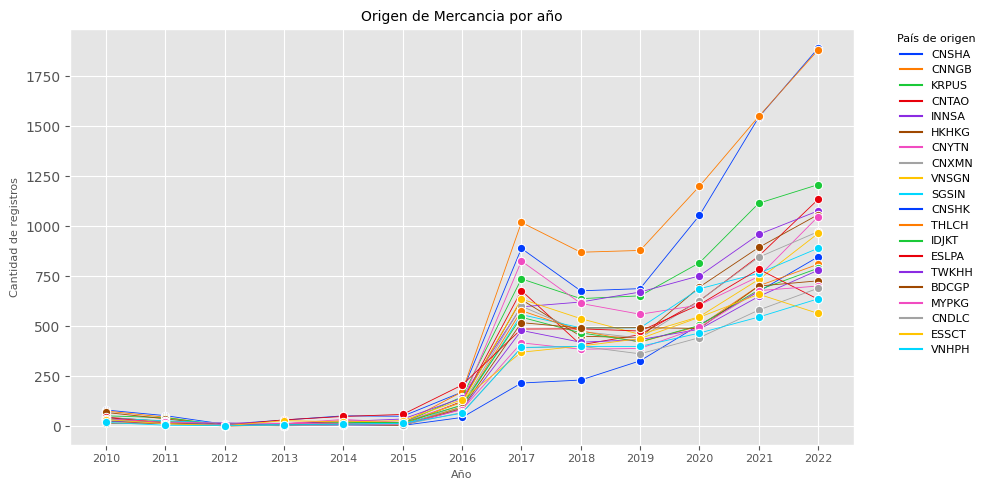

In [580]:
# lista de los 20 paises con mayor cantidad de registros
top_origen = top_origen.head(20).index.tolist()
# crea un dataframe con los 20 paises con mayor cantidad de registros
df_top_origen = df_origen[df_origen['ORIGEN_MERCADERIA'].isin(top_origen)]
# mantengo solo las columnas que me interesan
df_top_origen = df_top_origen[["ORIGEN_MERCADERIA", "ARRIVAL_YEAR"]]
# agrupa prueba por ORIGEN_MERCADERIA y ARRIVAL_YEAR y cuenta los registros por años
top_origen_plot = df_top_origen.groupby(["ORIGEN_MERCADERIA", "ARRIVAL_YEAR"]).size().reset_index(name='count').sort_values(by='count', ascending=False)
# crea un gráfico de lineas con los 20 paises con mayor cantidad de registros
# estilo ggplot
plt.style.use('ggplot')
# definimos el tamaño del gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(x="ARRIVAL_YEAR", y="count", hue="ORIGEN_MERCADERIA", data=top_origen_plot, linewidth=0.6, markers=True, dashes=True, ci=None, marker='o', palette='bright')
# añade título al gráfico
plt.gca().set_title("Origen de Mercancia por año", fontsize=10)
# añade etiquetas al eje x
plt.xlabel("Año", fontsize=8)
# añade etiquetas al eje y
plt.ylabel("Cantidad de registros", fontsize=8)
# cambia el numero de ticks del eje x y la fuente de los ticks
plt.xticks(np.arange(2010, 2023, 1), fontsize=8)
# leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8, title="País de origen", title_fontsize=8, frameon=False)
plt.tight_layout()
plt.show()

____


In [590]:
# filtra ORIGEN_MERCADERIA valores nulos
df_origen_clean = df[df['ORIGEN_MERCADERIA'].notnull()]

df_origen_clean = df_origen_clean[["TERMINAL", "ORIGEN_MERCADERIA", "ARRIVAL_YEAR"]]



In [594]:
group = df_origen_clean.groupby(["TERMINAL", "ORIGEN_MERCADERIA", "ARRIVAL_YEAR"]).size().reset_index(name='count').sort_values(by='count', ascending=False).head(20)

group 

,TERMINAL,ORIGEN_MERCADERIA,ARRIVAL_YEAR,count
517321,HUTCHISON PORTS BEST,CNSHA,2022,938
517087,HUTCHISON PORTS BEST,CNNGB,2022,933
4080,APM TERMINALS BARCELONA SLU,CNSHA,2021,777
517086,HUTCHISON PORTS BEST,CNNGB,2021,767
517320,HUTCHISON PORTS BEST,CNSHA,2021,706
3846,APM TERMINALS BARCELONA SLU,CNNGB,2021,688
518088,HUTCHISON PORTS BEST,CNYTN,2022,653
517085,HUTCHISON PORTS BEST,CNNGB,2020,622
4081,APM TERMINALS BARCELONA SLU,CNSHA,2022,607
517084,HUTCHISON PORTS BEST,CNNGB,2019,596


In [593]:
df_origen_clean.TERMINAL.value_counts()





HUTCHISON PORTS BEST                      162778
APM TERMINALS BARCELONA SLU               157517
PRAT TERCAT                                 5075
TERMINAL PORT NOU SA                        4871
DP WORLD SA                                 1411
TERMINAL DE JUNDIZ                          1102
TERMINAL MARITIMA ZARAGOZA                   549
CSP IBERIAN ZARAGOZA RAIL TERMINAL SL        508
AZUQUECA RAIL STATION                        476
DEPOT TMZ SERVICES SL                        429
PORTIC SA                                    348
TARRAGONA ENTREVIAS                          343
LEADER TRANSPORT ARAGON SL                   133
TERMINAL INTERMODAL DE NAVARRA.              130
TERMINAL A DETERMINAR                        130
RENFE OPERADORA                              118
BARCELONA MORROT                              32
MIRANDA - RAIL STATION                        17
DECAL ESPAÑA S A                              10
DAMEX S.A.                                    10
MEDITERRANEAN SHIPIN

In [584]:
# read the csv file into a pandas dataframe
df2 = pd.read_csv('data_2.csv', 
                dtype={'ESCALA':object,
                        'NIF_CONSIGNATARI_MERCADERIA':'category', 
                        'CONSIGNATARIO:':'category','NIF_TRANSPORTISTA':'category',
                        'NIF_TERMINAL':'category',
                        'TERMINAL':'category'},
                parse_dates=['MANIFEST_DATA_ARRIBADA','MANIFEST_DATA_ACTIVACIO','PETICIO_OT_DATA'])

In [583]:
df2.head()

,ESCALA,NIF_CONSIGNATARI_MERCADERIA,CONSIGNATARIO,MANIFEST_DATA_ARRIBADA,MANIFEST_DATA_ACTIVACIO,DIFF,NIF_TERMINAL,TERMINAL,ORIGEN_MERCADERIA,PETICIO_OT_DATA
0,20087,A08439473,CATALANA DEL MAR SA,2020-09-13 06:21:00.000,2020-09-13 05:57:00.000,-19.000000,B62120175,APM TERMINALS BARCELONA SLU,CNTAO,2011-02-15 17:52:00.000
1,20087,A08439473,CATALANA DEL MAR SA,2020-09-13 06:21:00.000,2020-09-13 05:57:00.000,-19.000000,B62120175,APM TERMINALS BARCELONA SLU,CNTAO,2011-02-15 17:50:00.000
2,19635,A08439473,CATALANA DEL MAR SA,2020-08-13 03:20:00.000,2020-08-19 14:36:00.000,7375.166667,B62120175,APM TERMINALS BARCELONA SLU,CNTAO,2011-01-26 10:54:00.000
3,30023,B63929970,ORIENT OVERSEAS CONTAINER LINE SPAIN,2021-11-17 14:43:00.000,2021-11-18 07:57:00.000,818.583333,B62120175,APM TERMINALS BARCELONA SLU,CNSHA,2012-03-14 10:26:00.000
4,28978,B63929970,ORIENT OVERSEAS CONTAINER LINE SPAIN,2021-11-27 05:04:00.000,2021-11-27 03:46:00.000,-61.750000,B62120175,APM TERMINALS BARCELONA SLU,KRPUS,2012-02-13 10:48:00.000
